# 1. Business Understanding

# 2. Data Integration

## 2.1 Libraries Import

In [41]:
# Necessary installations

#!pip install seaborn
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install scipy
#!pip install ydata-profiling

# Necessary imports

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport
import preproc as p

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Data Load

In [107]:
# Importing the dataset
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=';')
df.set_index('ID', inplace=True)

### 2.2.1 Metadata

ID: Customer ID

Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format

Age: The age of the customer

DaysSinceCreation: Number of elapsed days since the customer was created

NameHash: Hash of the customer's name

DocIDHash: Hash of the customer’s personal document identification number (usually a passport or ID card)

AverageLeadTime: Average number of days before arrival date the customer makes bookings

LodgingRevenue: Total amount of lodging revenue paid by the customer so far

OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far

BookingsCanceled: Number of bookings the customer made but subsequently canceled

BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"

BookingsCheckedin: Number of bookings the customer made, which actually ended up staying

PersonNights: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in
each booking, multiplied by the number of Nights (Length-of-stay) of the booking

RoomNights: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of
rooms of each booking by the the number of Nights (Length-of stay) of the booking

DistributionChannel: Distribution channel normally used by the customer to make bookings at the hotel

MarketSegment: Current market segment of the customer

SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)

SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)

SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)

SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)

SRBathtub Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)

SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)

SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)

SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)

SRTwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)

SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)

SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)

SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)

SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

NOTE: All time-based columns (e.g., Age or DaysSinceCreation) were calculated at the dataset extraction date.

### 2.2.2 Data Overview

In [57]:
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Data Cleaning/Preparation


In [27]:
df.isnull().sum()

Nationality                0
Age                        0
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRAccessibleRoom           0
SRCrib                     0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
Floor_asked                0
Bath asked                 0
Bed_asked                  0
Distance_elevator_asked    0
dtype: int64

H2- tratamento idade- with knn inputer

In [108]:
cols_to_use_in_calculation = ['Age', 'DaysSinceCreation', 'AverageLeadTime','PersonsNights','RoomNights']
imputer = KNNImputer(n_neighbors=5)
df["Age"]=imputer.fit_transform(df[cols_to_use_in_calculation])

## 3.1 Drop Hash columns

In [109]:
df = df.drop(columns=["NameHash","DocIDHash"])
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,59,292.00,82.3,1,0,2,6,...,0,0,0,0,0,0,0,0,0,0
2,PRT,53.6,1385,61,280.00,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,93,240.00,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0,0.00,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,170,755.25,20.0,0,0,1,10,...,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0,0.00,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
Profile= ProfileReport(df, explorative = True)

In [31]:
Profile.to_file("profile_data_treated.html")

c:\Users\tomas\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
df.drop_duplicates(inplace=True)

# Tratamento idade onde o min é -10 assumir que foi o - foi colocado erradamente


In [111]:
df["Age"]=df["Age"].abs()

## Bookings cancelled and no showed have almost zero variance so we are going to eliminate both 99.9 is 0


In [112]:
df = df.drop(columns=["BookingsCanceled","BookingsNoShowed"])

# Joining binary variables

In [113]:
condicoes = [
    (df[['SRHighFloor', 'SRLowFloor', 'SRMediumFloor']].sum(axis=1) == 0),  # Nenhuma ativa
    (df['SRHighFloor'] == 1) & (df[['SRLowFloor', 'SRMediumFloor']].sum(axis=1) == 0),  # Apenas Var1
    (df['SRLowFloor'] == 1) & (df[['SRHighFloor', 'SRMediumFloor']].sum(axis=1) == 0),  # Apenas Var2
    (df['SRMediumFloor'] == 1) & (df[['SRHighFloor', 'SRLowFloor']].sum(axis=1) == 0),  # Apenas Var3
]

categorias = ['Não espcifico', 'HighFloor', 'LowFloor', 'MediumFloor']

In [114]:
df['Floor_asked'] = np.select(condicoes, categorias,default="Other")

In [117]:
df = df.drop(columns=["SRHighFloor", "SRLowFloor","SRMediumFloor"])

KeyError: "['SRHighFloor', 'SRLowFloor', 'SRMediumFloor'] not found in axis"

In [118]:
condicoes = [
    (df[['SRShower', 'SRBathtub']].sum(axis=1) == 0),  # Nenhuma ativa
    (df['SRShower'] == 1) & (df[['SRBathtub']].sum(axis=1) == 0),  # Apenas Var1
    (df['SRBathtub'] == 1) & (df[['SRShower']].sum(axis=1) == 0),  # Apenas Var2
]

categorias = ['Não espcifico', 'Showe', 'Bathtub']

In [119]:
df['Bath asked'] = np.select(condicoes, categorias,default="Other")

In [120]:
df = df.drop(columns=["SRShower", "SRBathtub"])

In [121]:
condicoes = [
    (df[['SRKingSizeBed', 'SRTwinBed']].sum(axis=1) == 0),  # Nenhuma ativa
    (df['SRKingSizeBed'] == 1) & (df[['SRTwinBed']].sum(axis=1) == 0),  # Apenas Var1
    (df['SRTwinBed'] == 1) & (df[['SRKingSizeBed']].sum(axis=1) == 0),  # Apenas Var2
]

categorias = ['Não espcifico', 'KingSizeBed', 'TwinBed']

In [122]:
df['Bed_asked'] = np.select(condicoes, categorias,default="Other")

In [123]:
df = df.drop(columns=["SRKingSizeBed", "SRTwinBed"])

In [124]:
condicoes = [
    (df[['SRAwayFromElevator', 'SRNearElevator']].sum(axis=1) == 0),  # Nenhuma ativa
    (df['SRAwayFromElevator'] == 1) & (df[['SRNearElevator']].sum(axis=1) == 0),  # Apenas Var1
    (df['SRNearElevator'] == 1) & (df[['SRAwayFromElevator']].sum(axis=1) == 0),  # Apenas Var2
]

categorias = ['No specific', 'Away from elevator', 'Near Elevator']

In [126]:
df['Distance_elevator_asked'] = np.select(condicoes, categorias,default="Other")

In [127]:
df = df.drop(columns=["SRAwayFromElevator", "SRNearElevator"])

# Checking for outliers

In [129]:
vars_out= df[["Age", "DaysSinceCreation", "AverageLeadTime", "BookingsCheckedIn","PersonsNights", "RoomNights"]]

In [130]:
vars_out

,Age,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights
ID,,,,,,
1,52.0,440,59,2,6,4
2,53.6,1385,61,1,10,5
3,32.0,1385,0,0,0,0
4,61.0,1385,93,1,10,5
5,52.0,1385,0,0,0,0
...,...,...,...,...,...,...
111729,31.0,36,0,0,0,0
111730,43.0,36,170,1,10,5
111731,37.0,36,0,0,0,0


In [131]:
%matplotlib inline
def create_boxplots(df, save_fig=False):

    for col in df:
        plt.figure(figsize=(6, 4))  # Set figure size
        sns.boxplot(y=df[col], color='skyblue')  # Create boxplot
        plt.title(f"Boxplot of {col}")  # Set title
        plt.ylabel(col)  # Set label
        
        if save_fig:
            plt.savefig(f"boxplot_{col}.png")  # Save as PNG
        plt.show()  

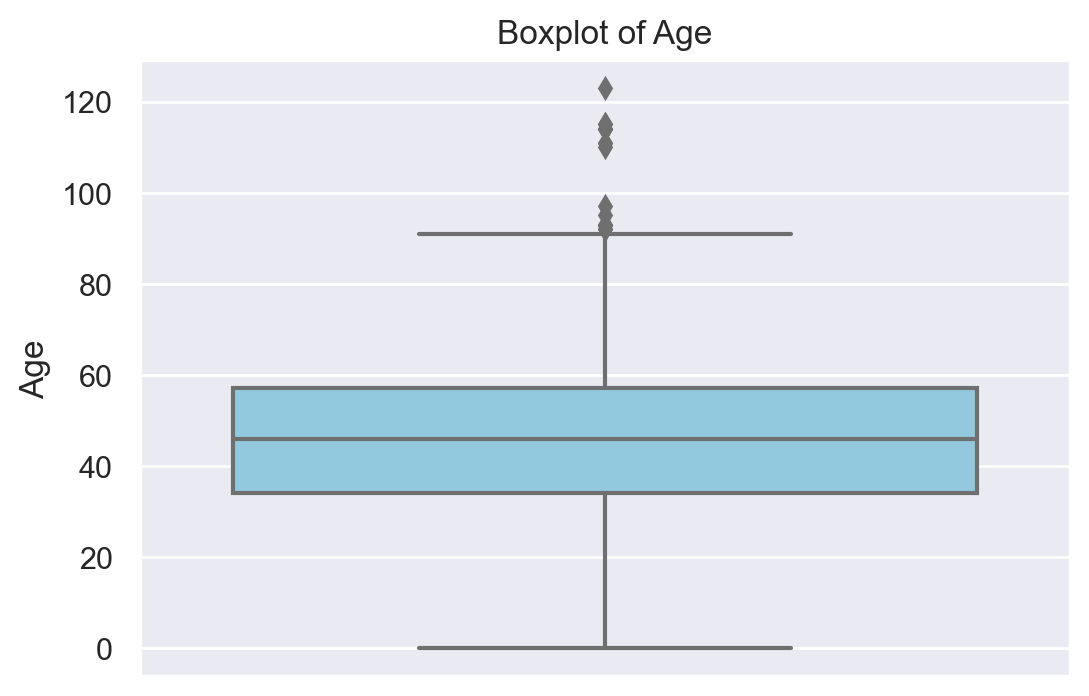

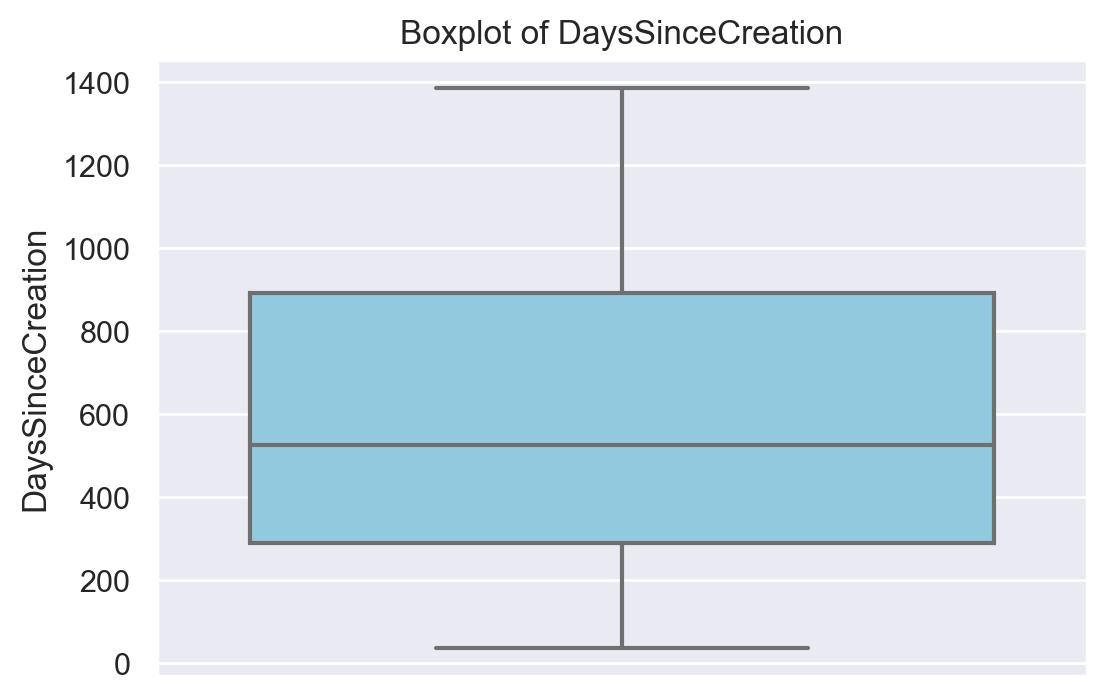

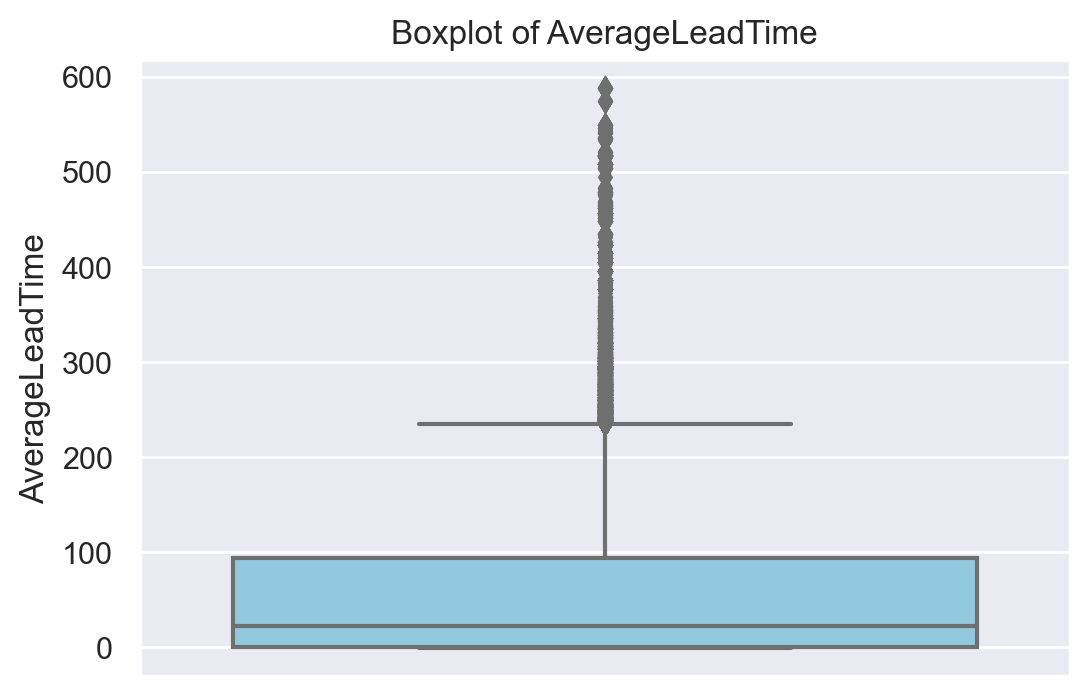

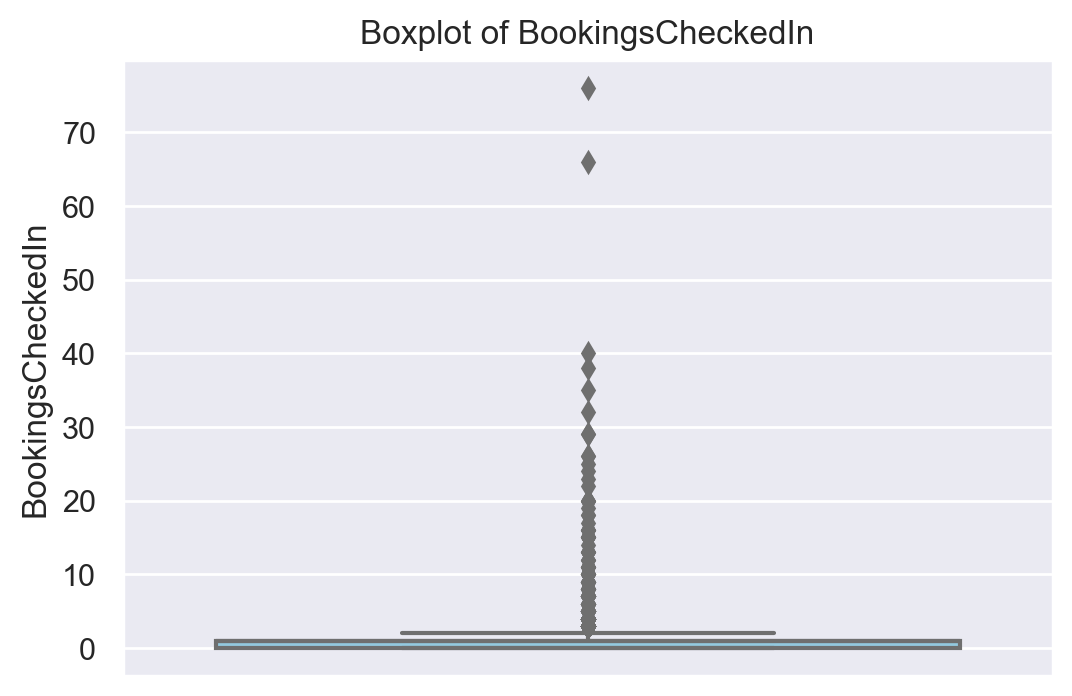

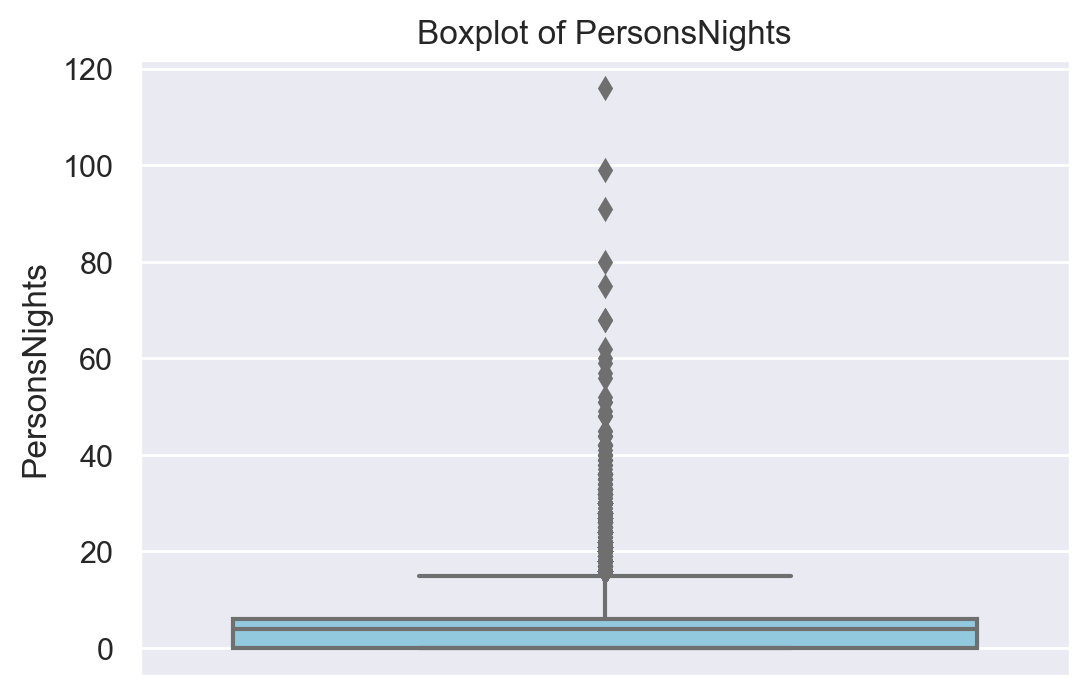

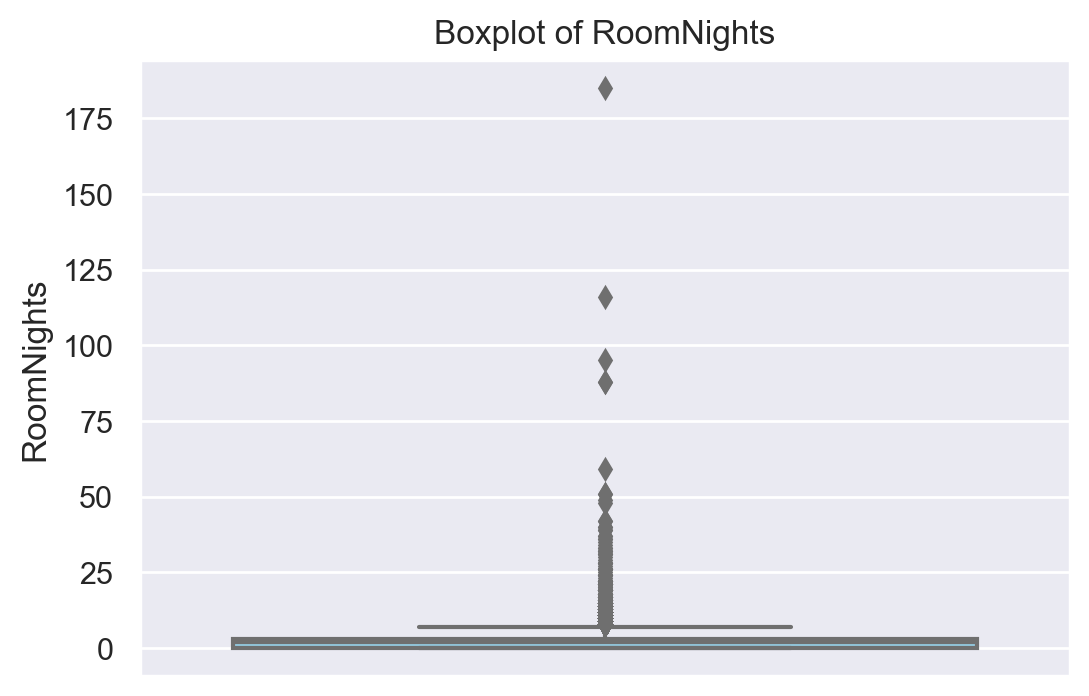

In [132]:
create_boxplots(vars_out)

Column: Age - Number of Outliers: 17
Column: Age - % of Outliers: 0.02% 



c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


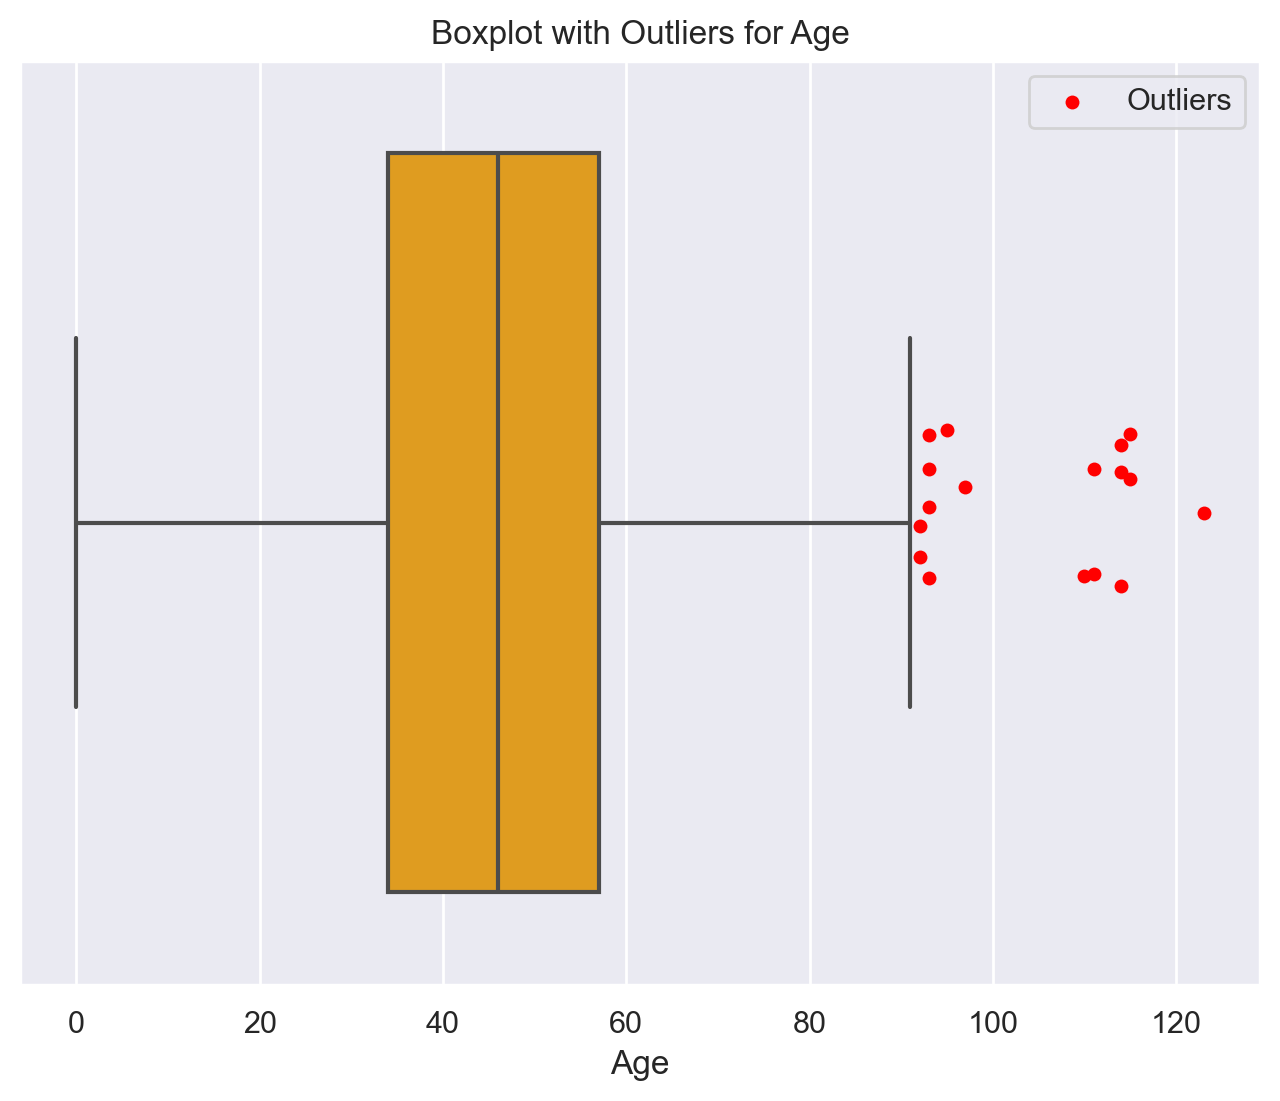

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: DaysSinceCreation - Number of Outliers: 0
Column: DaysSinceCreation - % of Outliers: 0.00% 



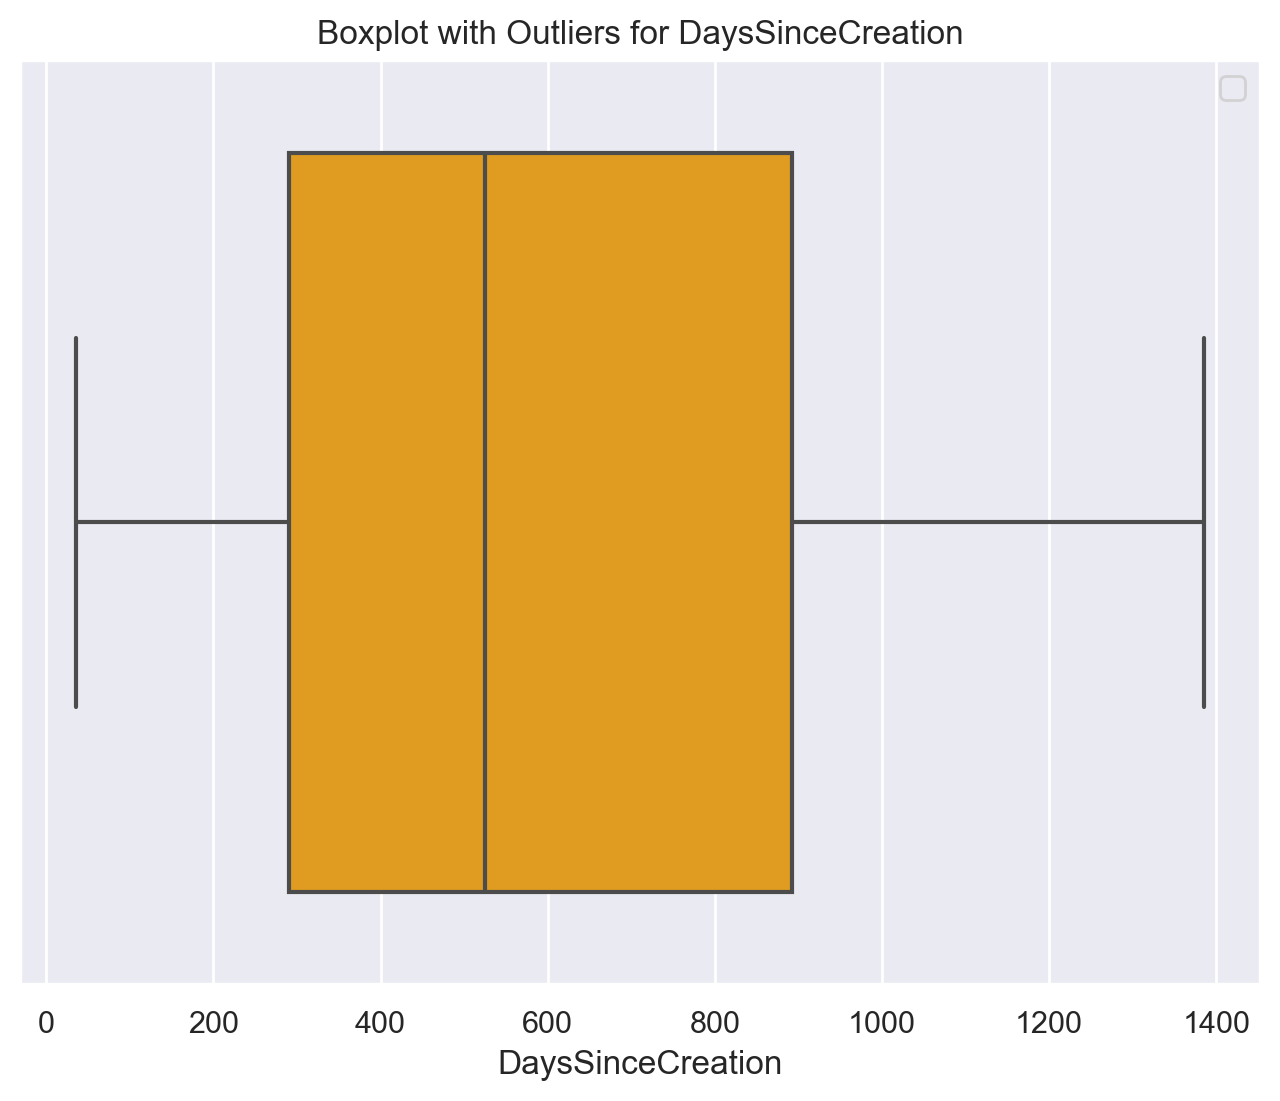

Column: AverageLeadTime - Number of Outliers: 5226
Column: AverageLeadTime - % of Outliers: 4.83% 



c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


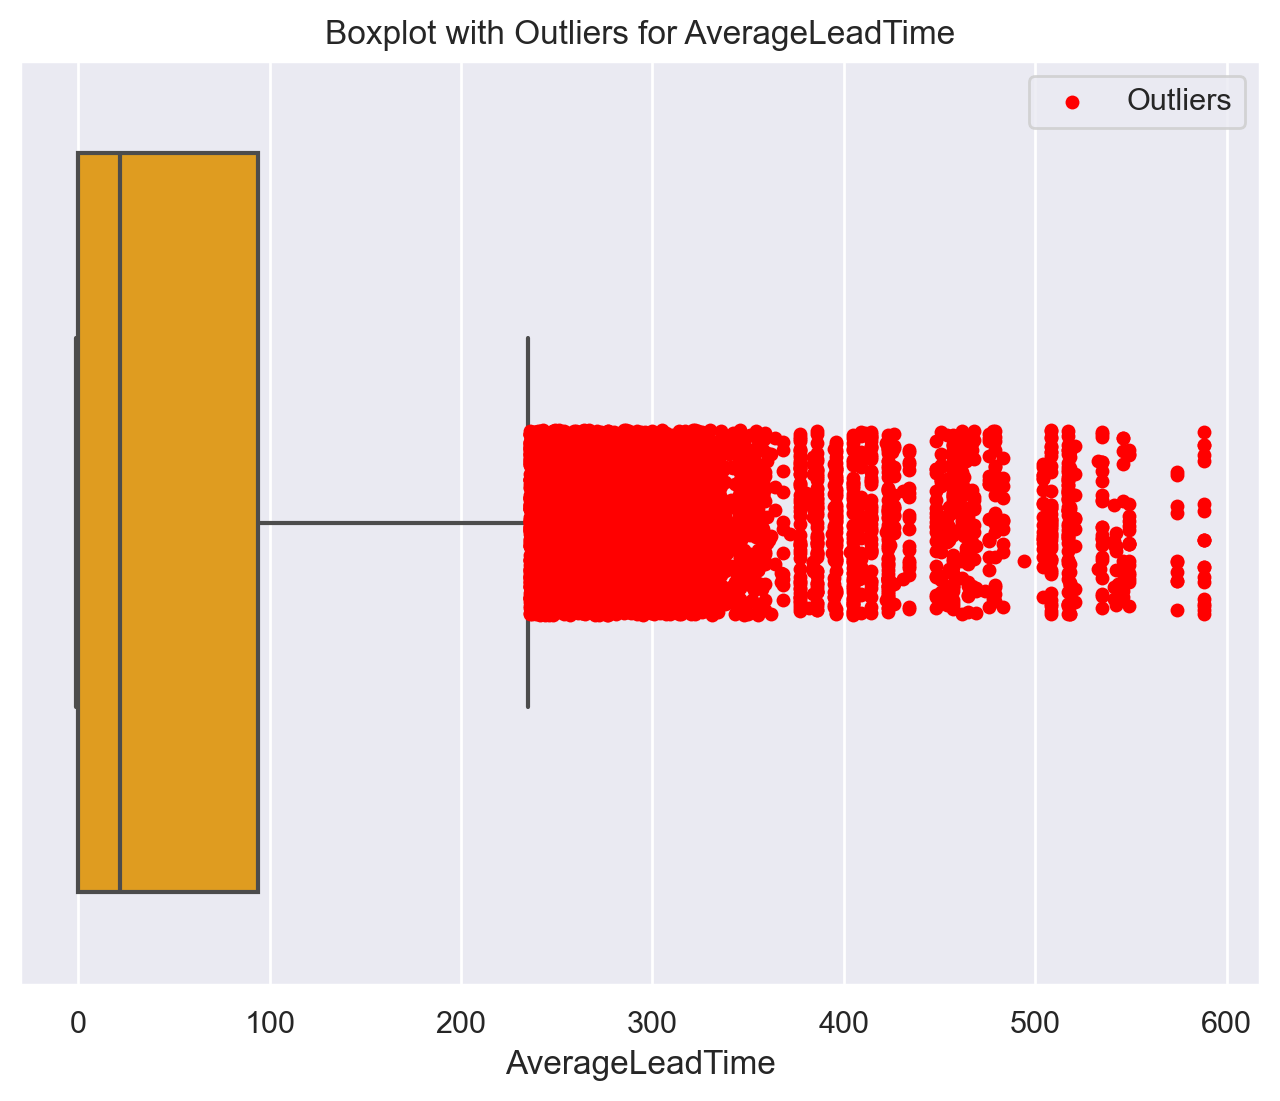

Column: BookingsCheckedIn - Number of Outliers: 427
Column: BookingsCheckedIn - % of Outliers: 0.39% 



c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


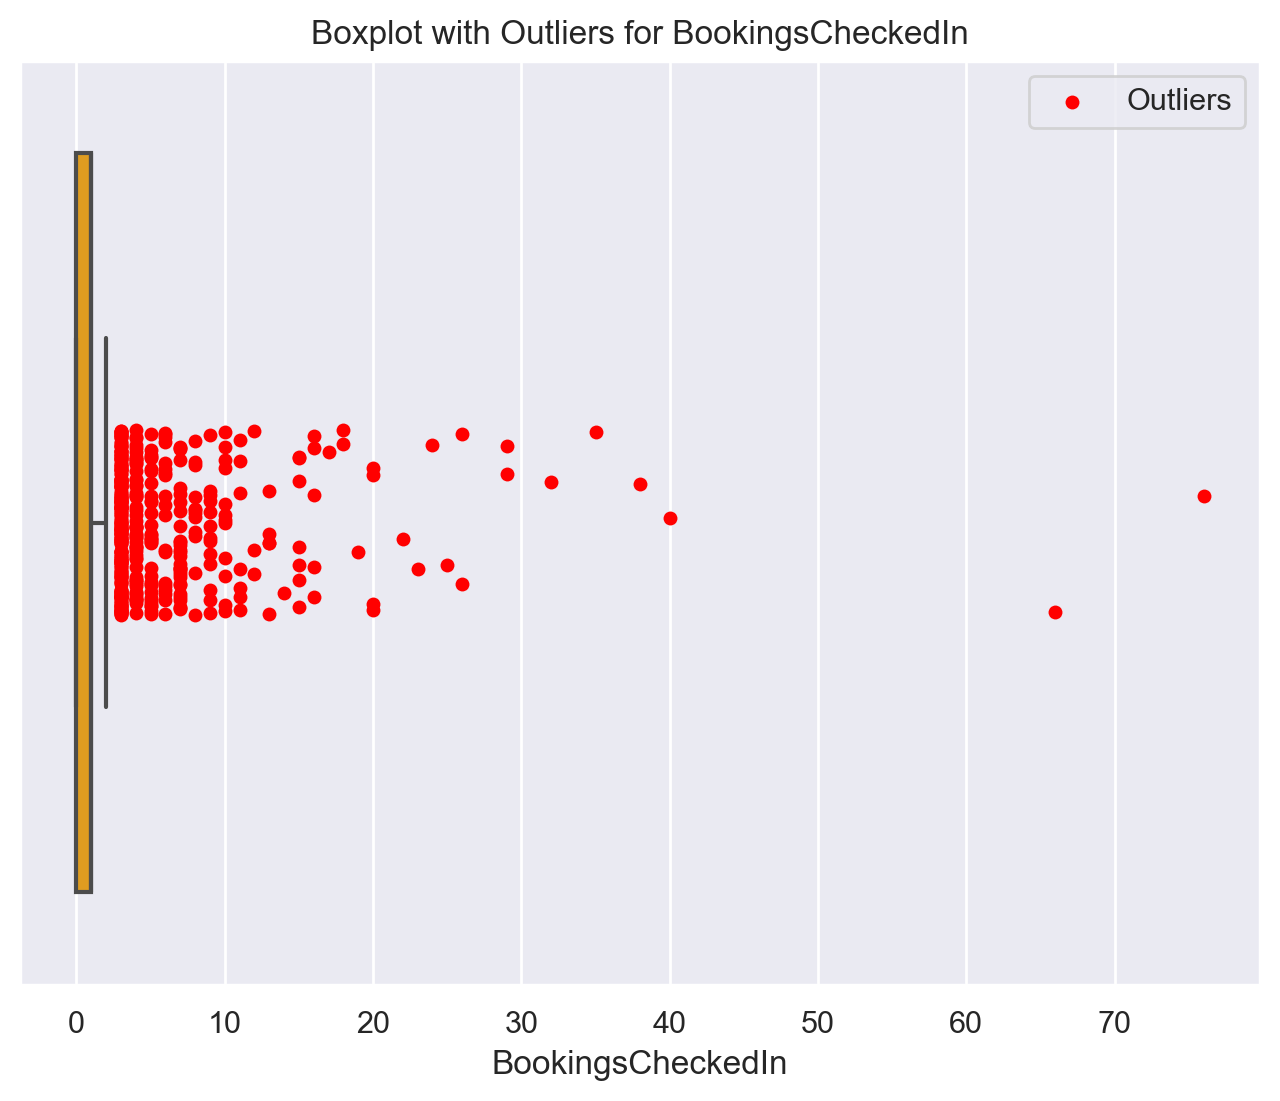

Column: PersonsNights - Number of Outliers: 2442
Column: PersonsNights - % of Outliers: 2.26% 



c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


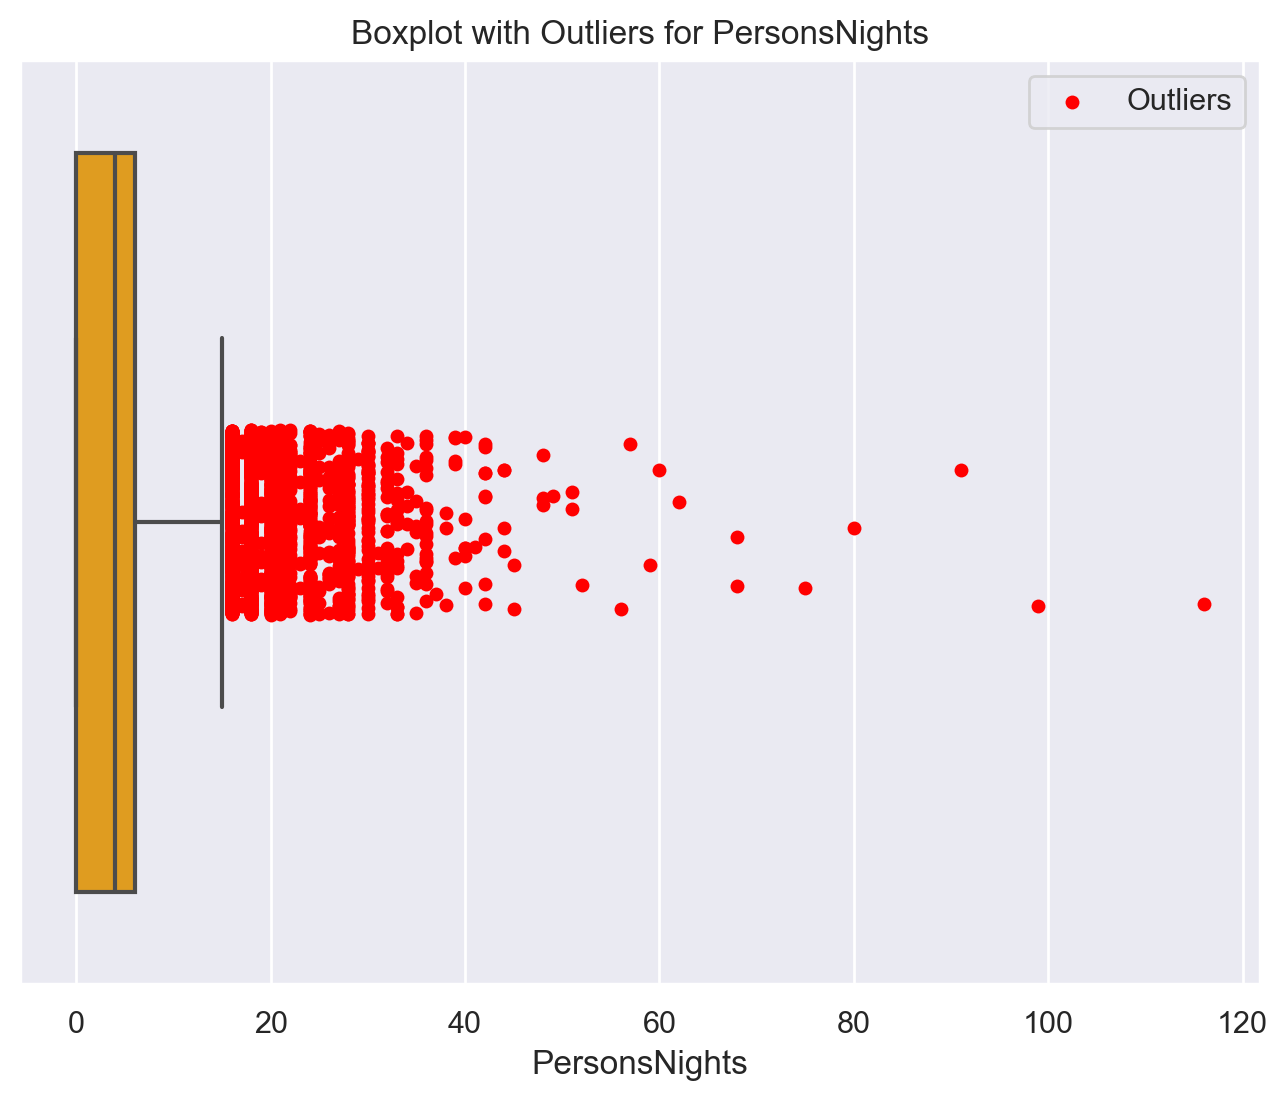

Column: RoomNights - Number of Outliers: 1388
Column: RoomNights - % of Outliers: 1.28% 



c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomas\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


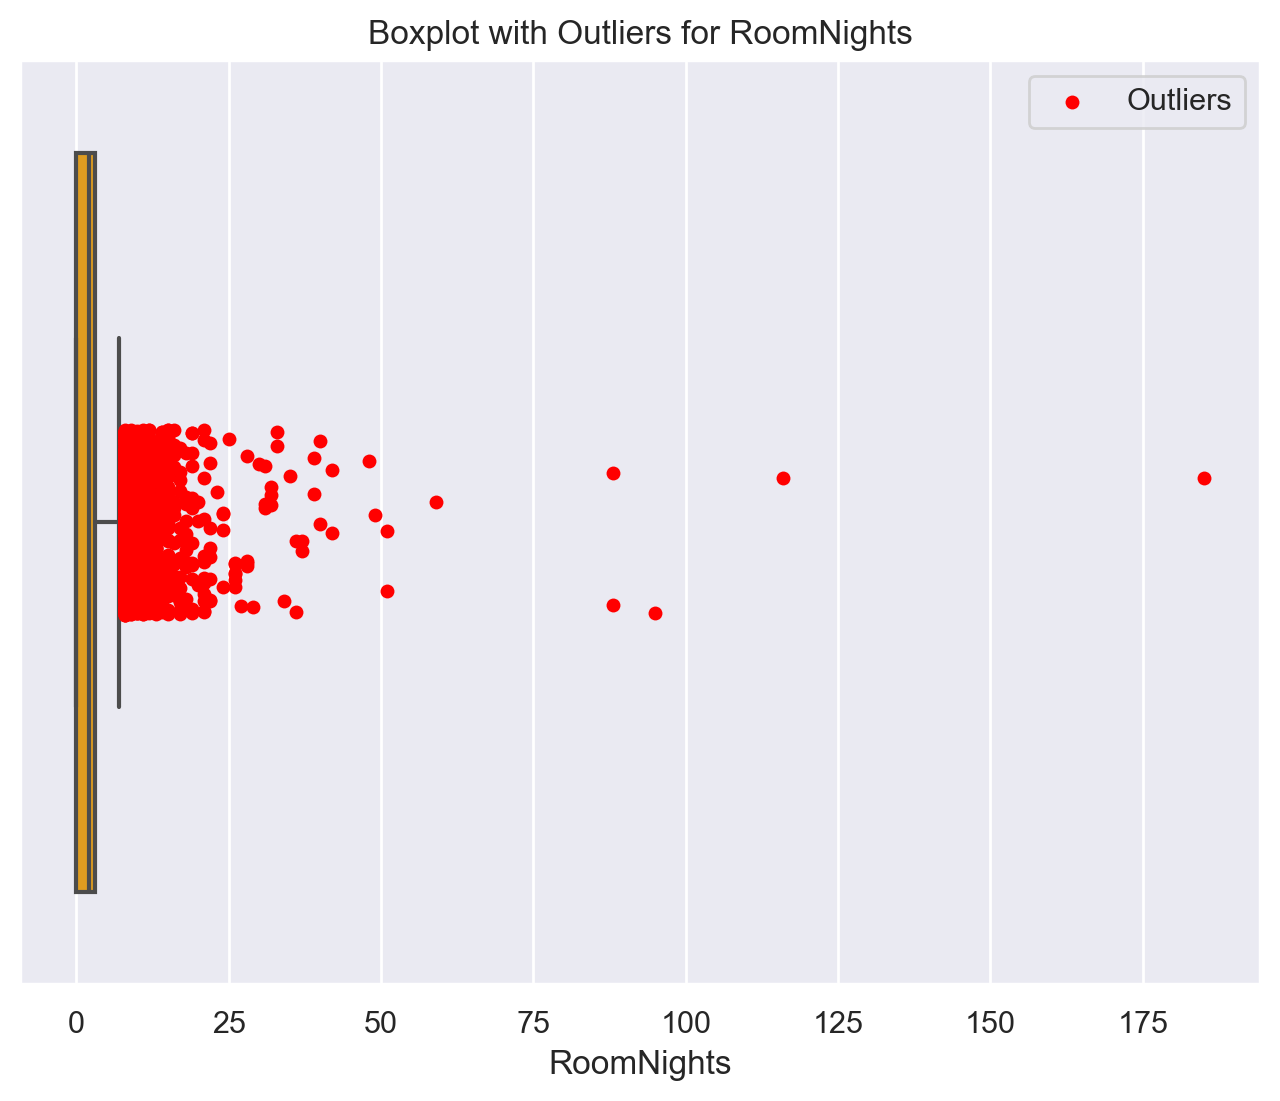

Columns with more than 5% Outliers:
[]


{'Age': {'lower_bound': -0.5, 'upper_bound': 91.5},
 'DaysSinceCreation': {'lower_bound': -613.0, 'upper_bound': 1795.0},
 'AverageLeadTime': {'lower_bound': -141.0, 'upper_bound': 235.0},
 'BookingsCheckedIn': {'lower_bound': -1.5, 'upper_bound': 2.5},
 'PersonsNights': {'lower_bound': -9.0, 'upper_bound': 15.0},
 'RoomNights': {'lower_bound': -4.5, 'upper_bound': 7.5}}

In [133]:
p.detect_outliers_iqr(vars_out,5)

## Como são poucos outliers vamos elimina-los

In [134]:
df_ready_to_EDA = df[(df["Age"] > -0.5) & (df["Age"]< 91.5)]
df_ready_to_EDA = df_ready_to_EDA[(df["DaysSinceCreation"] > -613) & (df["DaysSinceCreation"]< 1795)]
df_ready_to_EDA = df_ready_to_EDA[(df["AverageLeadTime"] > -141) & (df["AverageLeadTime"]< 235)]
df_ready_to_EDA = df_ready_to_EDA[(df["BookingsCheckedIn"] > -1.5) & (df["BookingsCheckedIn"]< 2.5)]
df_ready_to_EDA = df_ready_to_EDA[(df["PersonsNights"] > -9) & (df["PersonsNights"]< 15)]
df_ready_to_EDA = df_ready_to_EDA[(df["RoomNights"] > -4.5) & (df["RoomNights"]< 7.5)]


C:\Users\tomas\AppData\Local\Temp\ipykernel_11440\1150731651.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ready_to_EDA = df_ready_to_EDA[(df["DaysSinceCreation"] > -613) & (df["DaysSinceCreation"]< 1795)]
C:\Users\tomas\AppData\Local\Temp\ipykernel_11440\1150731651.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ready_to_EDA = df_ready_to_EDA[(df["AverageLeadTime"] > -141) & (df["AverageLeadTime"]< 235)]
C:\Users\tomas\AppData\Local\Temp\ipykernel_11440\1150731651.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ready_to_EDA = df_ready_to_EDA[(df["BookingsCheckedIn"] > -1.5) & (df["BookingsCheckedIn"]< 2.5)]
C:\Users\tomas\AppData\Local\Temp\ipykernel_11440\1150731651.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ready_to_EDA = df_ready_to_EDA[(df["PersonsNights"] > -9) & (df["PersonsNights"]< 15)]
C:\Users\tomas\AppData\Local\T

In [135]:
len(df_ready_to_EDA)


99273

In [136]:
df_ready_to_EDA.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRAccessibleRoom,SRCrib,SRNoAlcoholInMiniBar,SRQuietRoom,Floor_asked,Bath asked,Bed_asked,Distance_elevator_asked
ID,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,59,292.0,82.3,2,6,4,Corporate,Corporate,0,0,0,0,Não espcifico,Não espcifico,Não espcifico,No specific
2,PRT,53.6,1385,61,280.0,53.0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,Não espcifico,Não espcifico,Não espcifico,No specific
3,DEU,32.0,1385,0,0.0,0.0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,Não espcifico,Não espcifico,Não espcifico,No specific
4,FRA,61.0,1385,93,240.0,60.0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,Não espcifico,Não espcifico,Não espcifico,No specific
5,FRA,52.0,1385,0,0.0,0.0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,Não espcifico,Não espcifico,Não espcifico,No specific


Start EDA

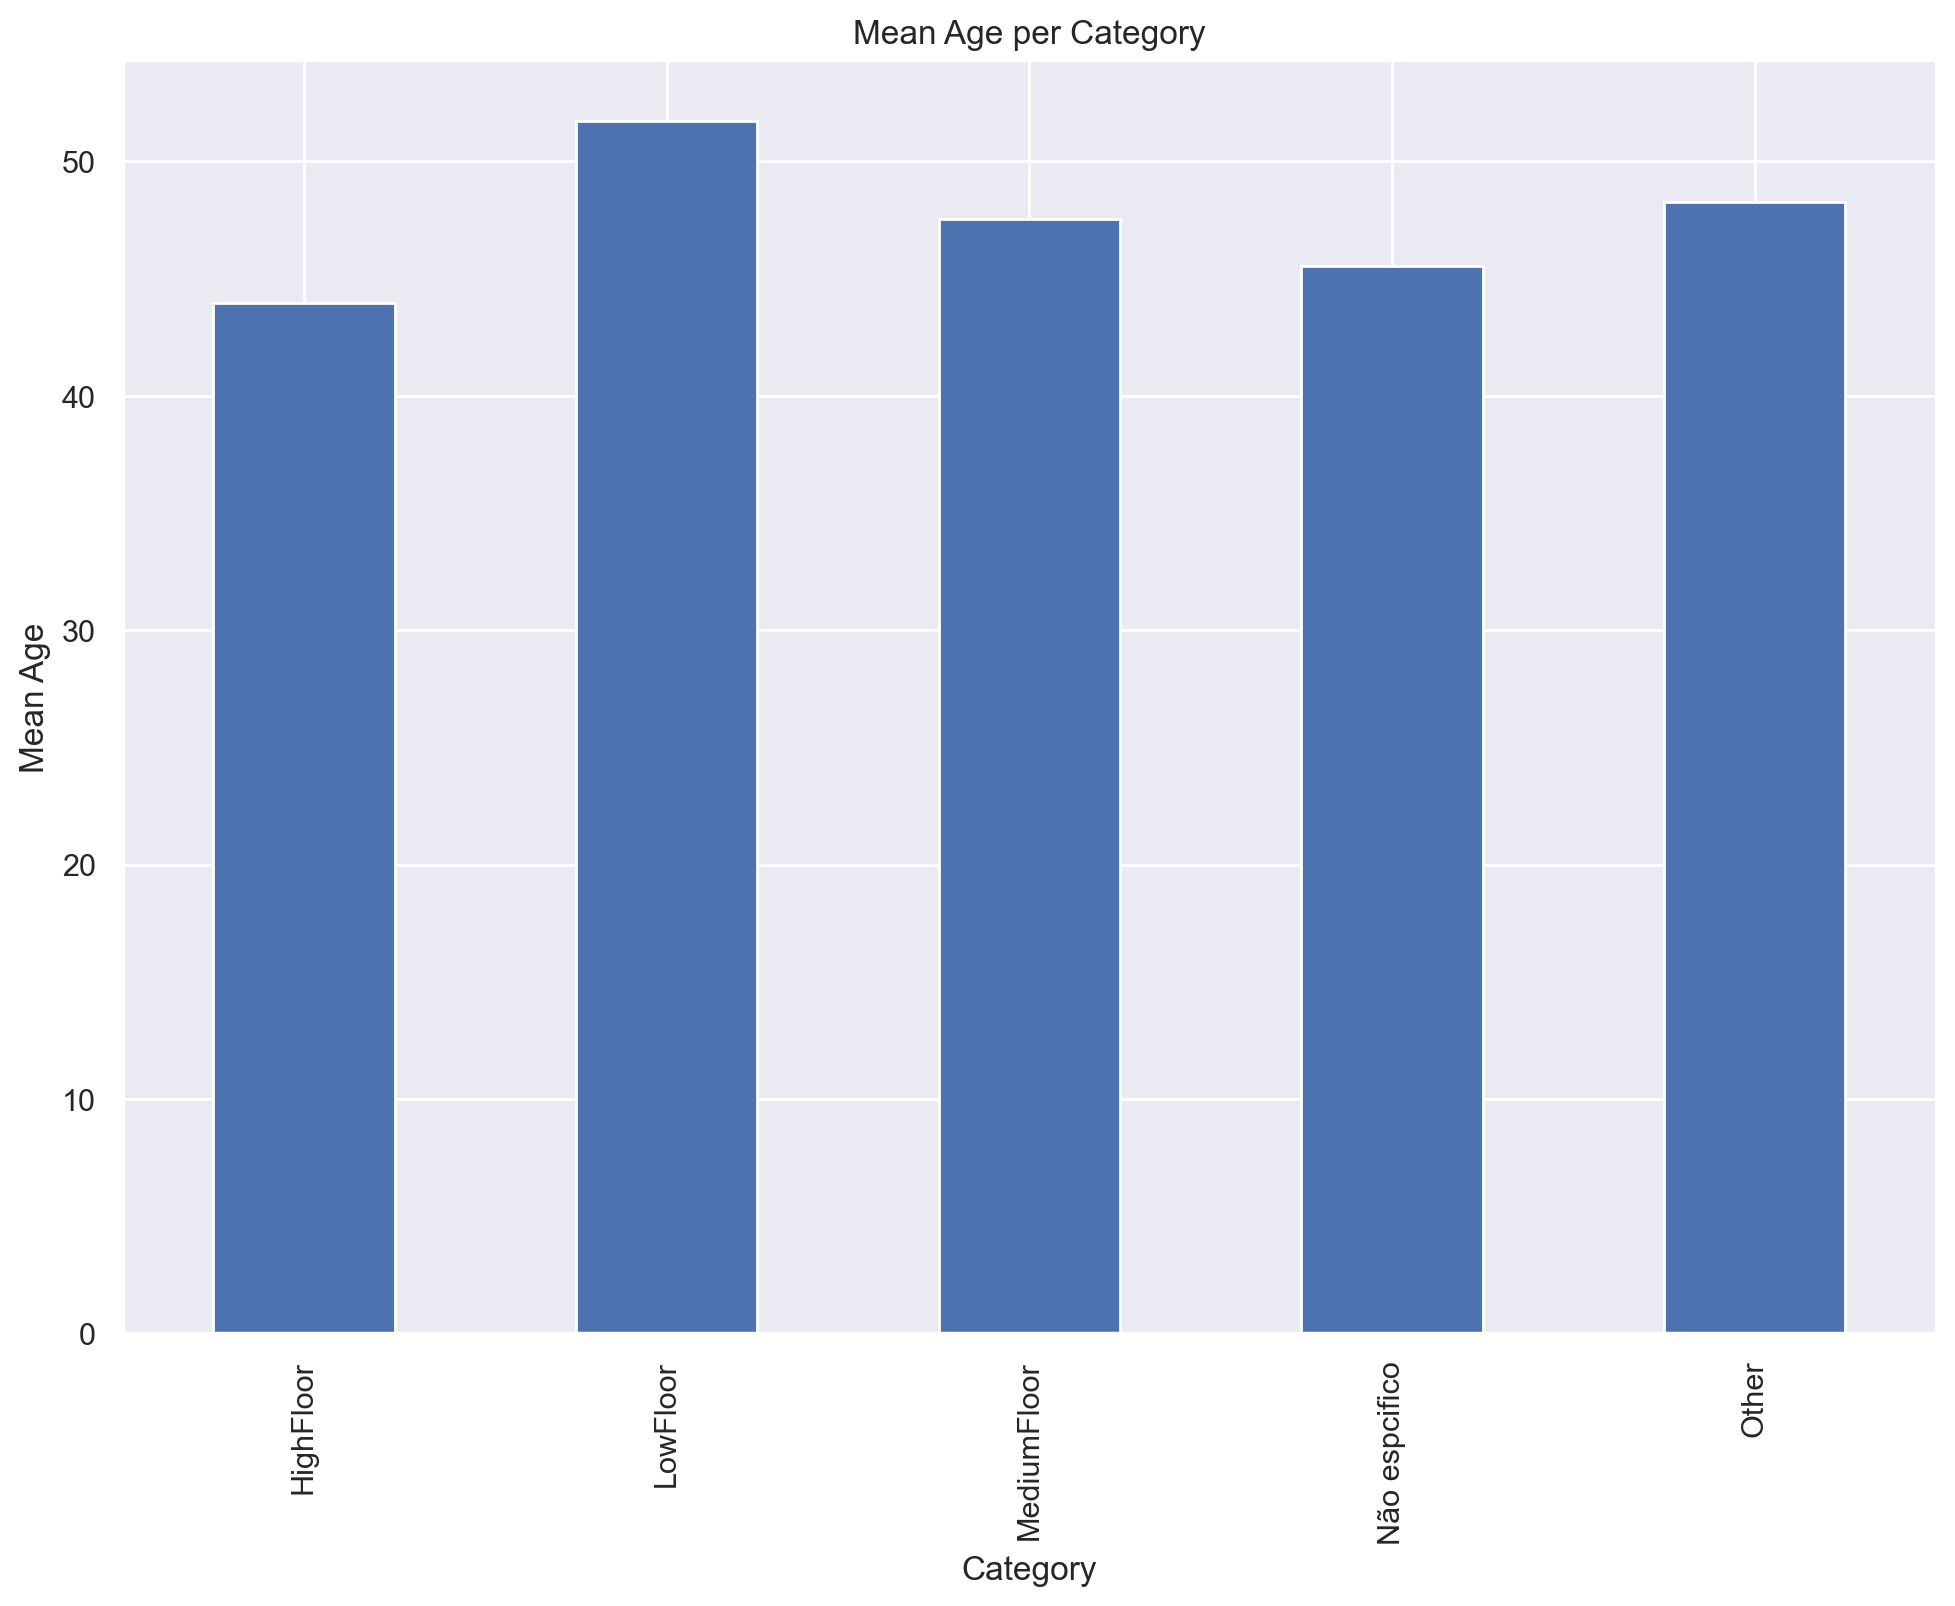

In [137]:
mean_age = df.groupby('Floor_asked')['Age'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

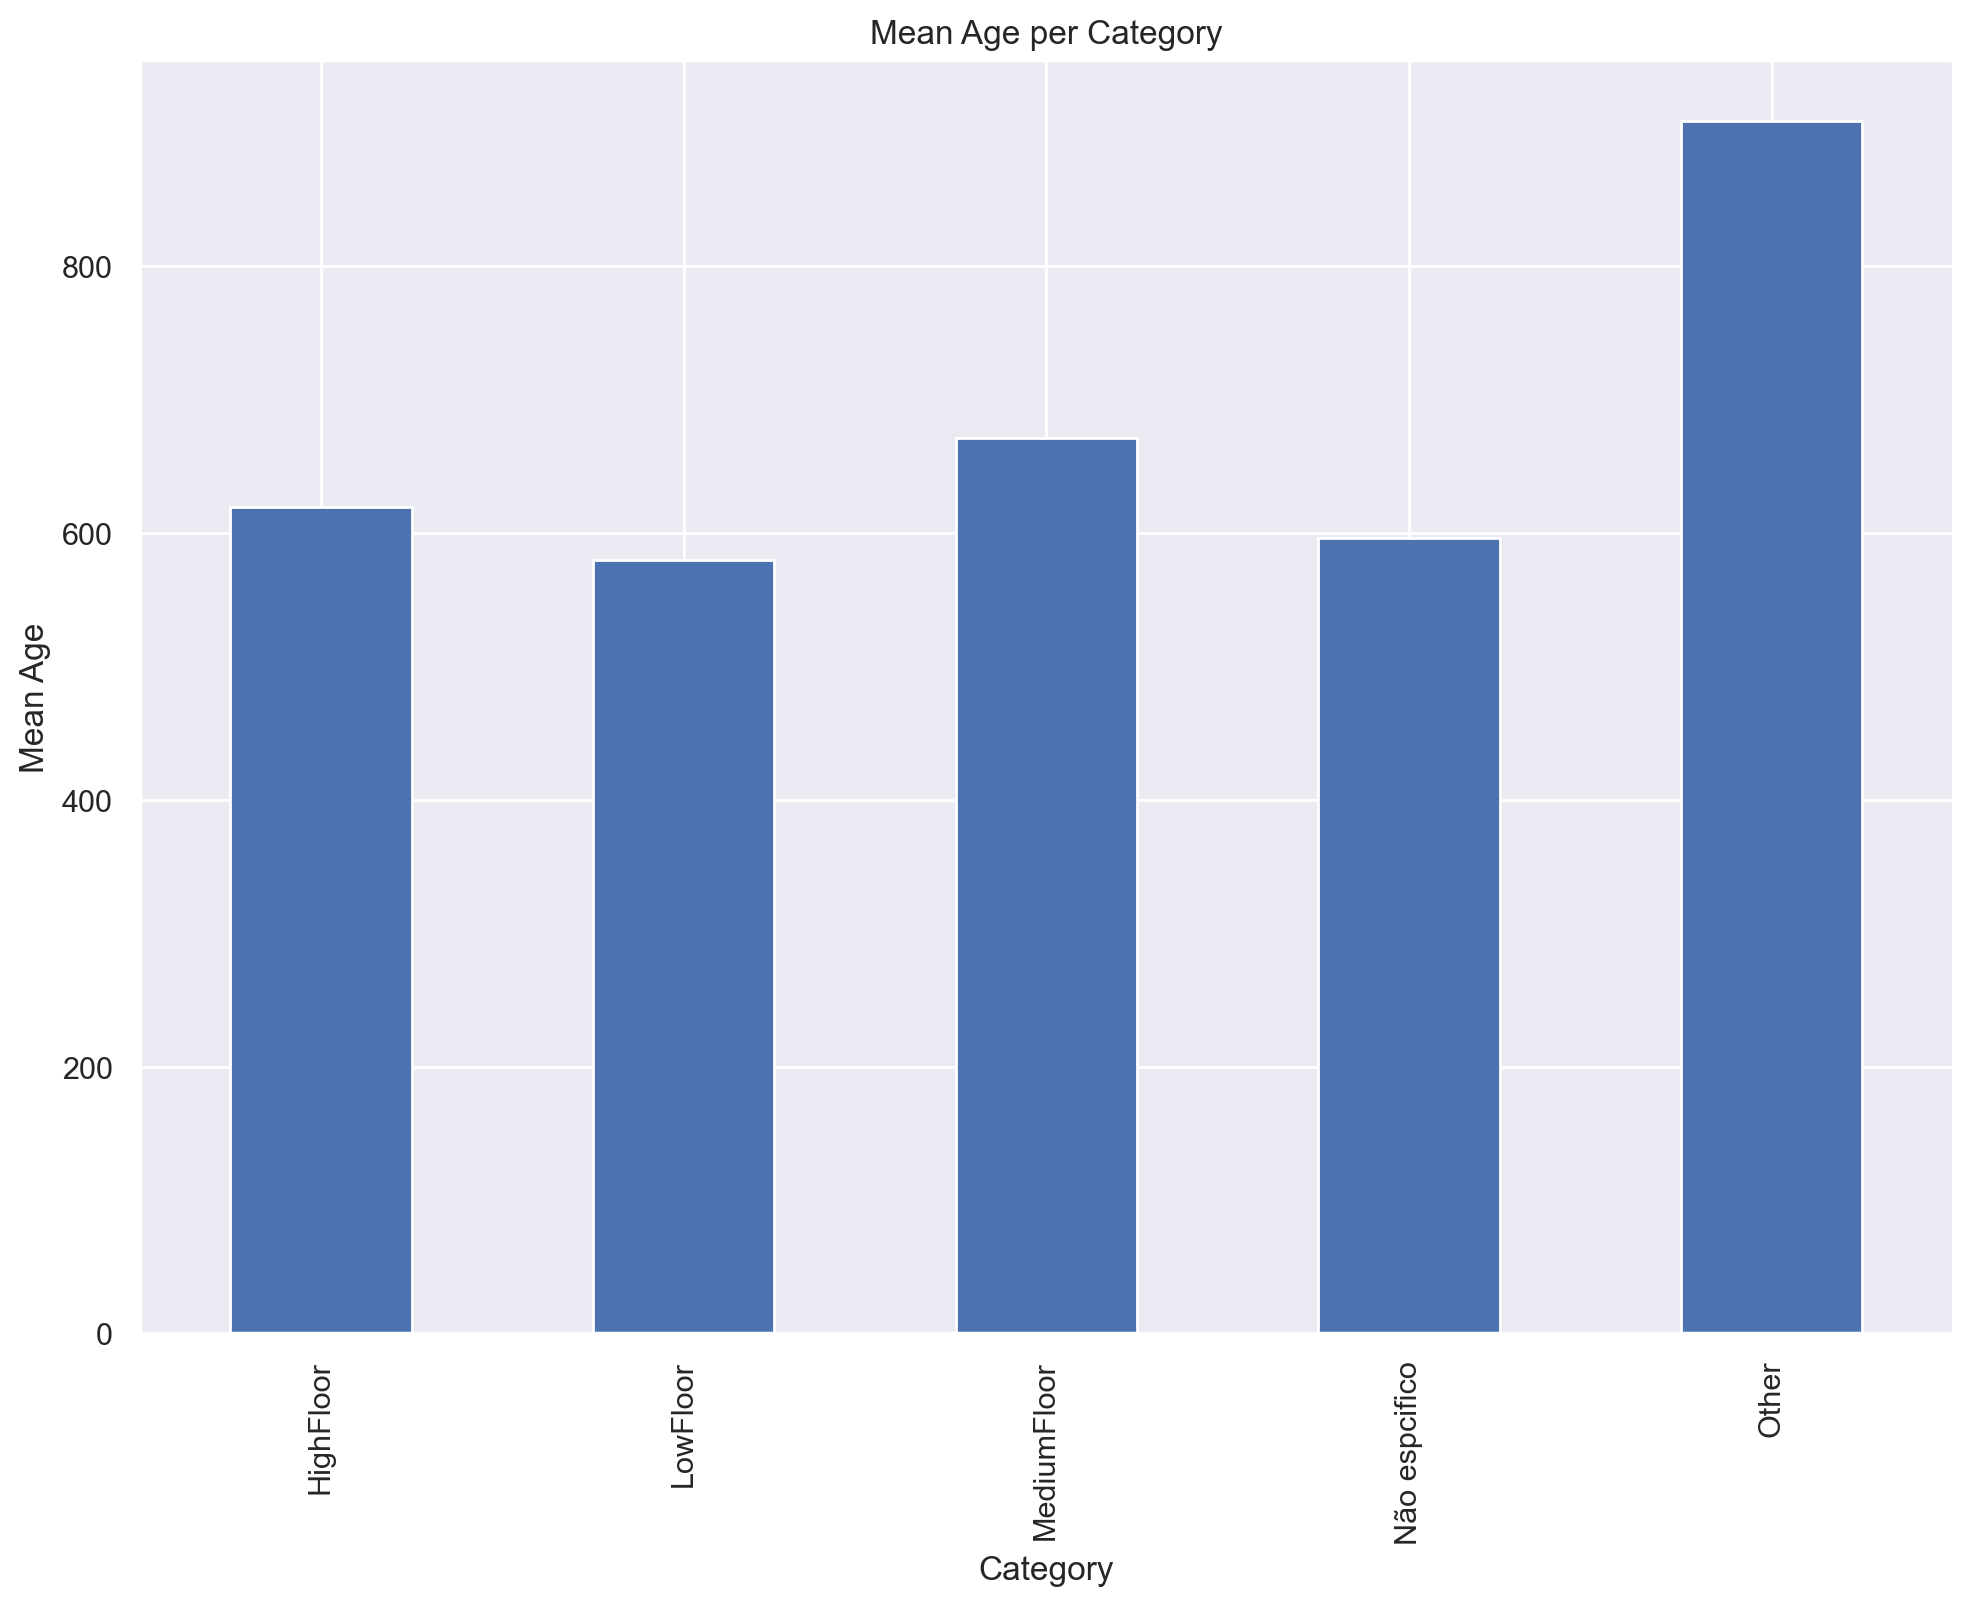

In [138]:
mean_age = df.groupby('Floor_asked')['DaysSinceCreation'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

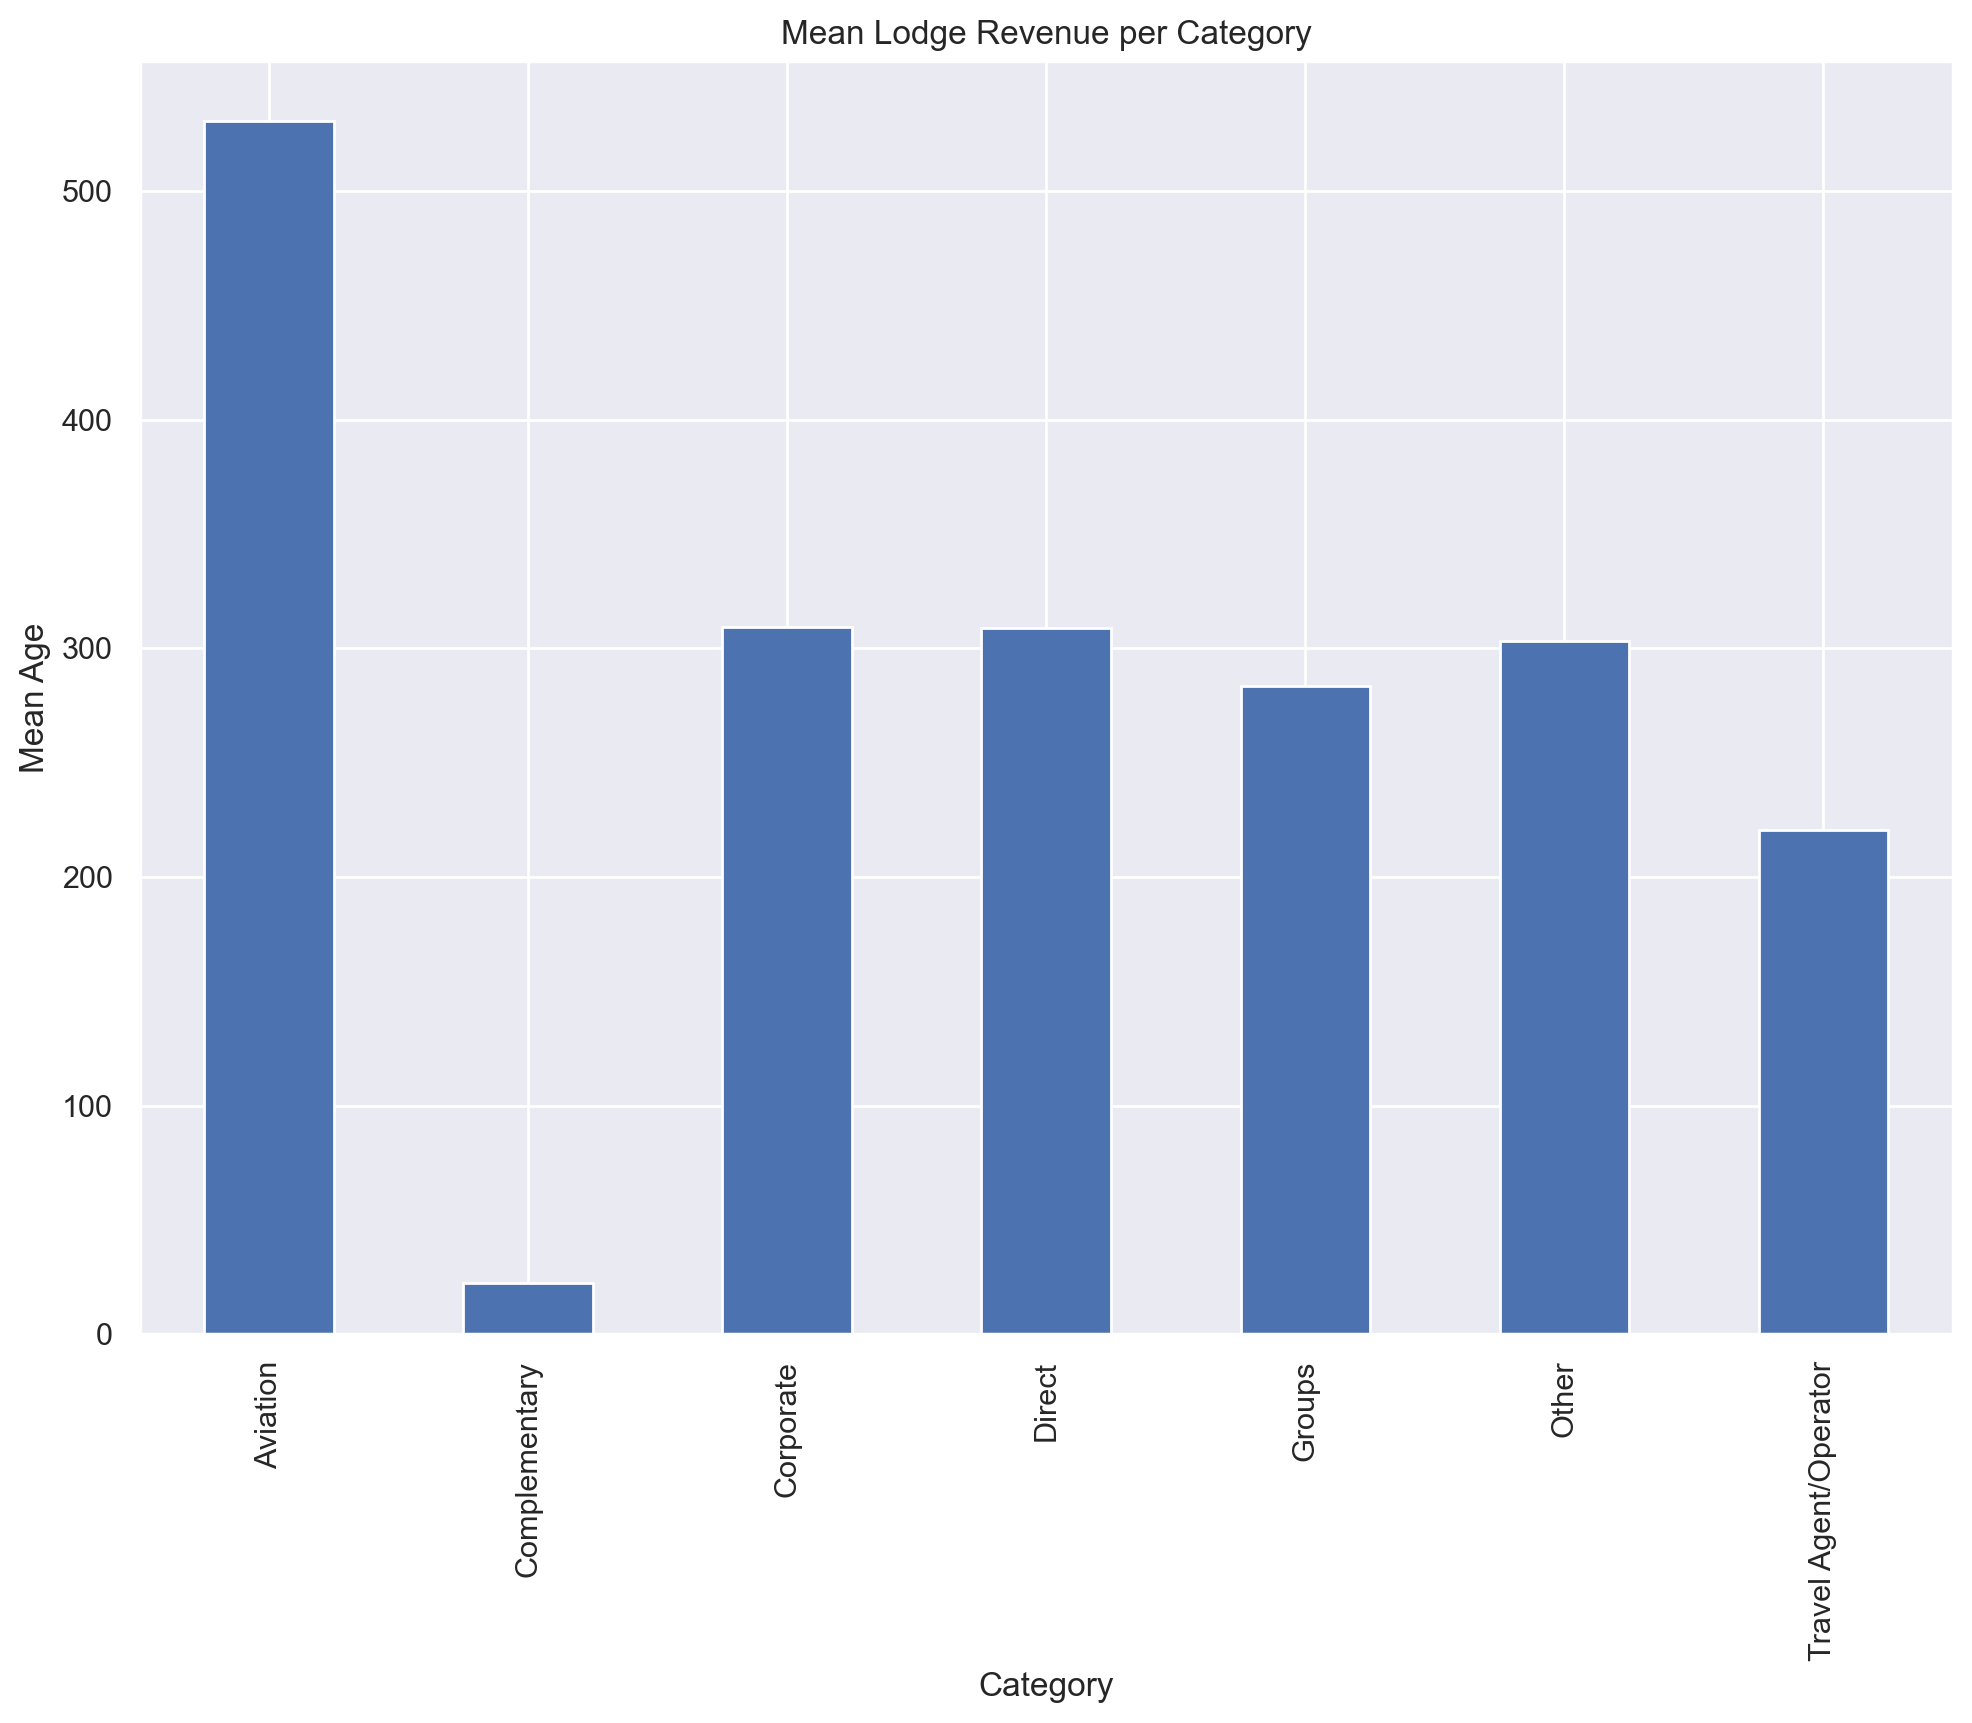

In [139]:
mean_age = df.groupby('MarketSegment')['LodgingRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Lodge Revenue per Category')

# Show the plot
plt.show()

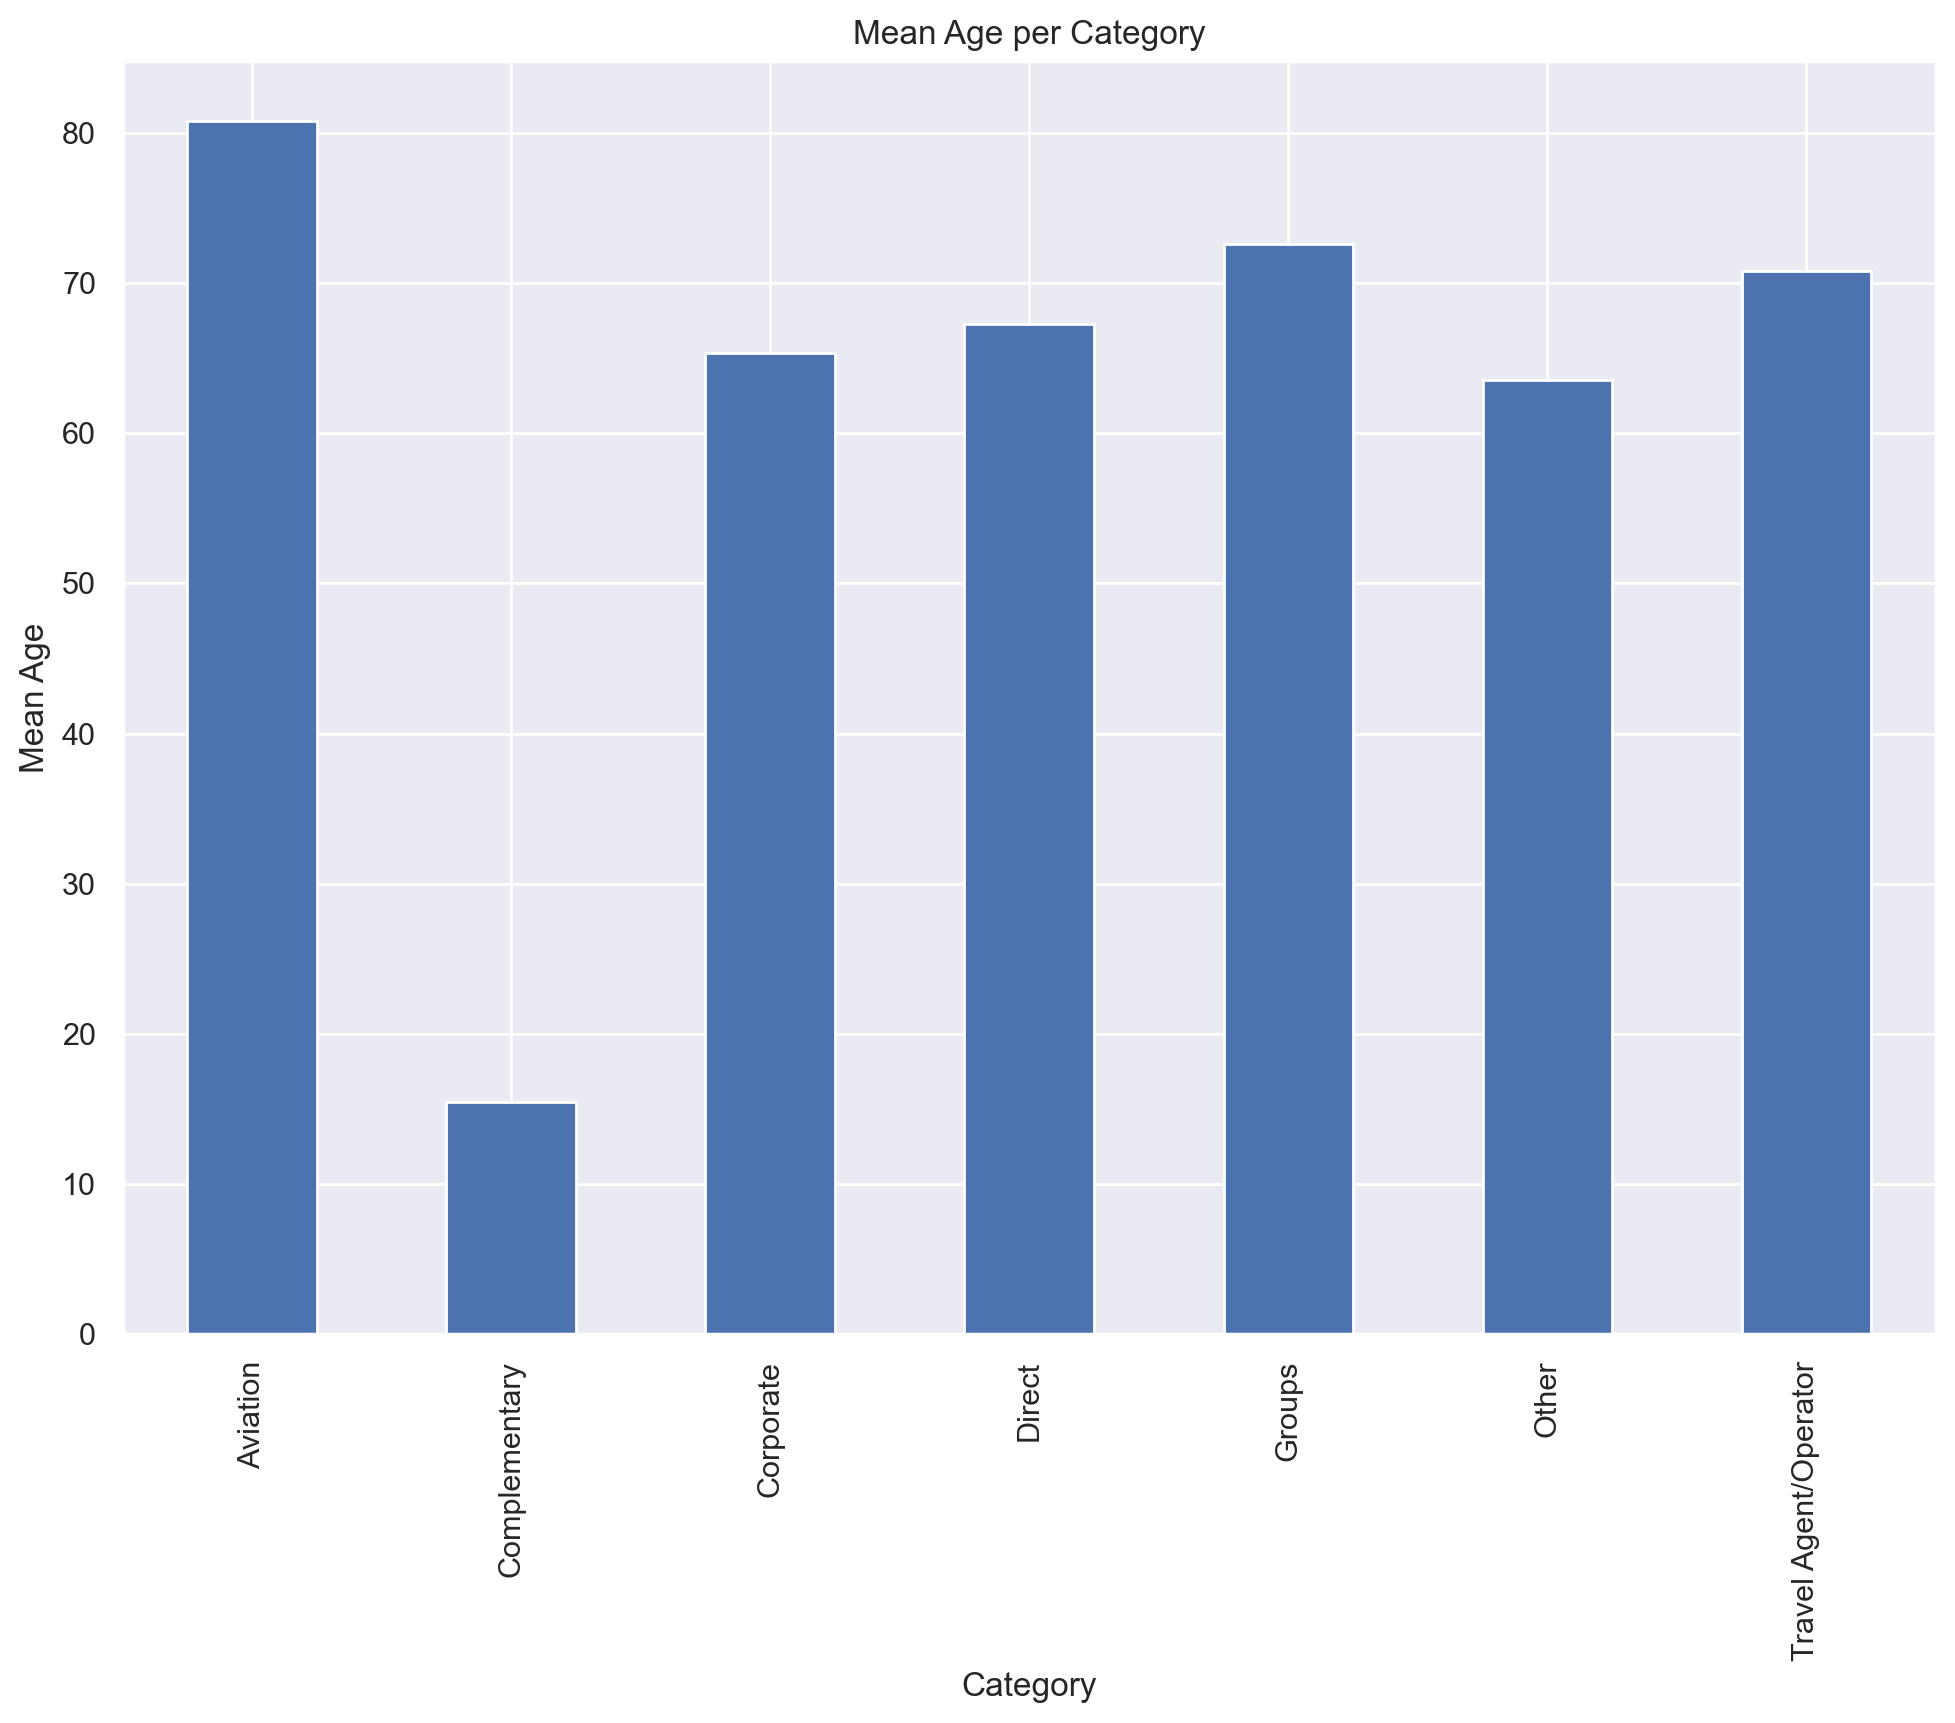

In [140]:
mean_age = df.groupby('MarketSegment')['OtherRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

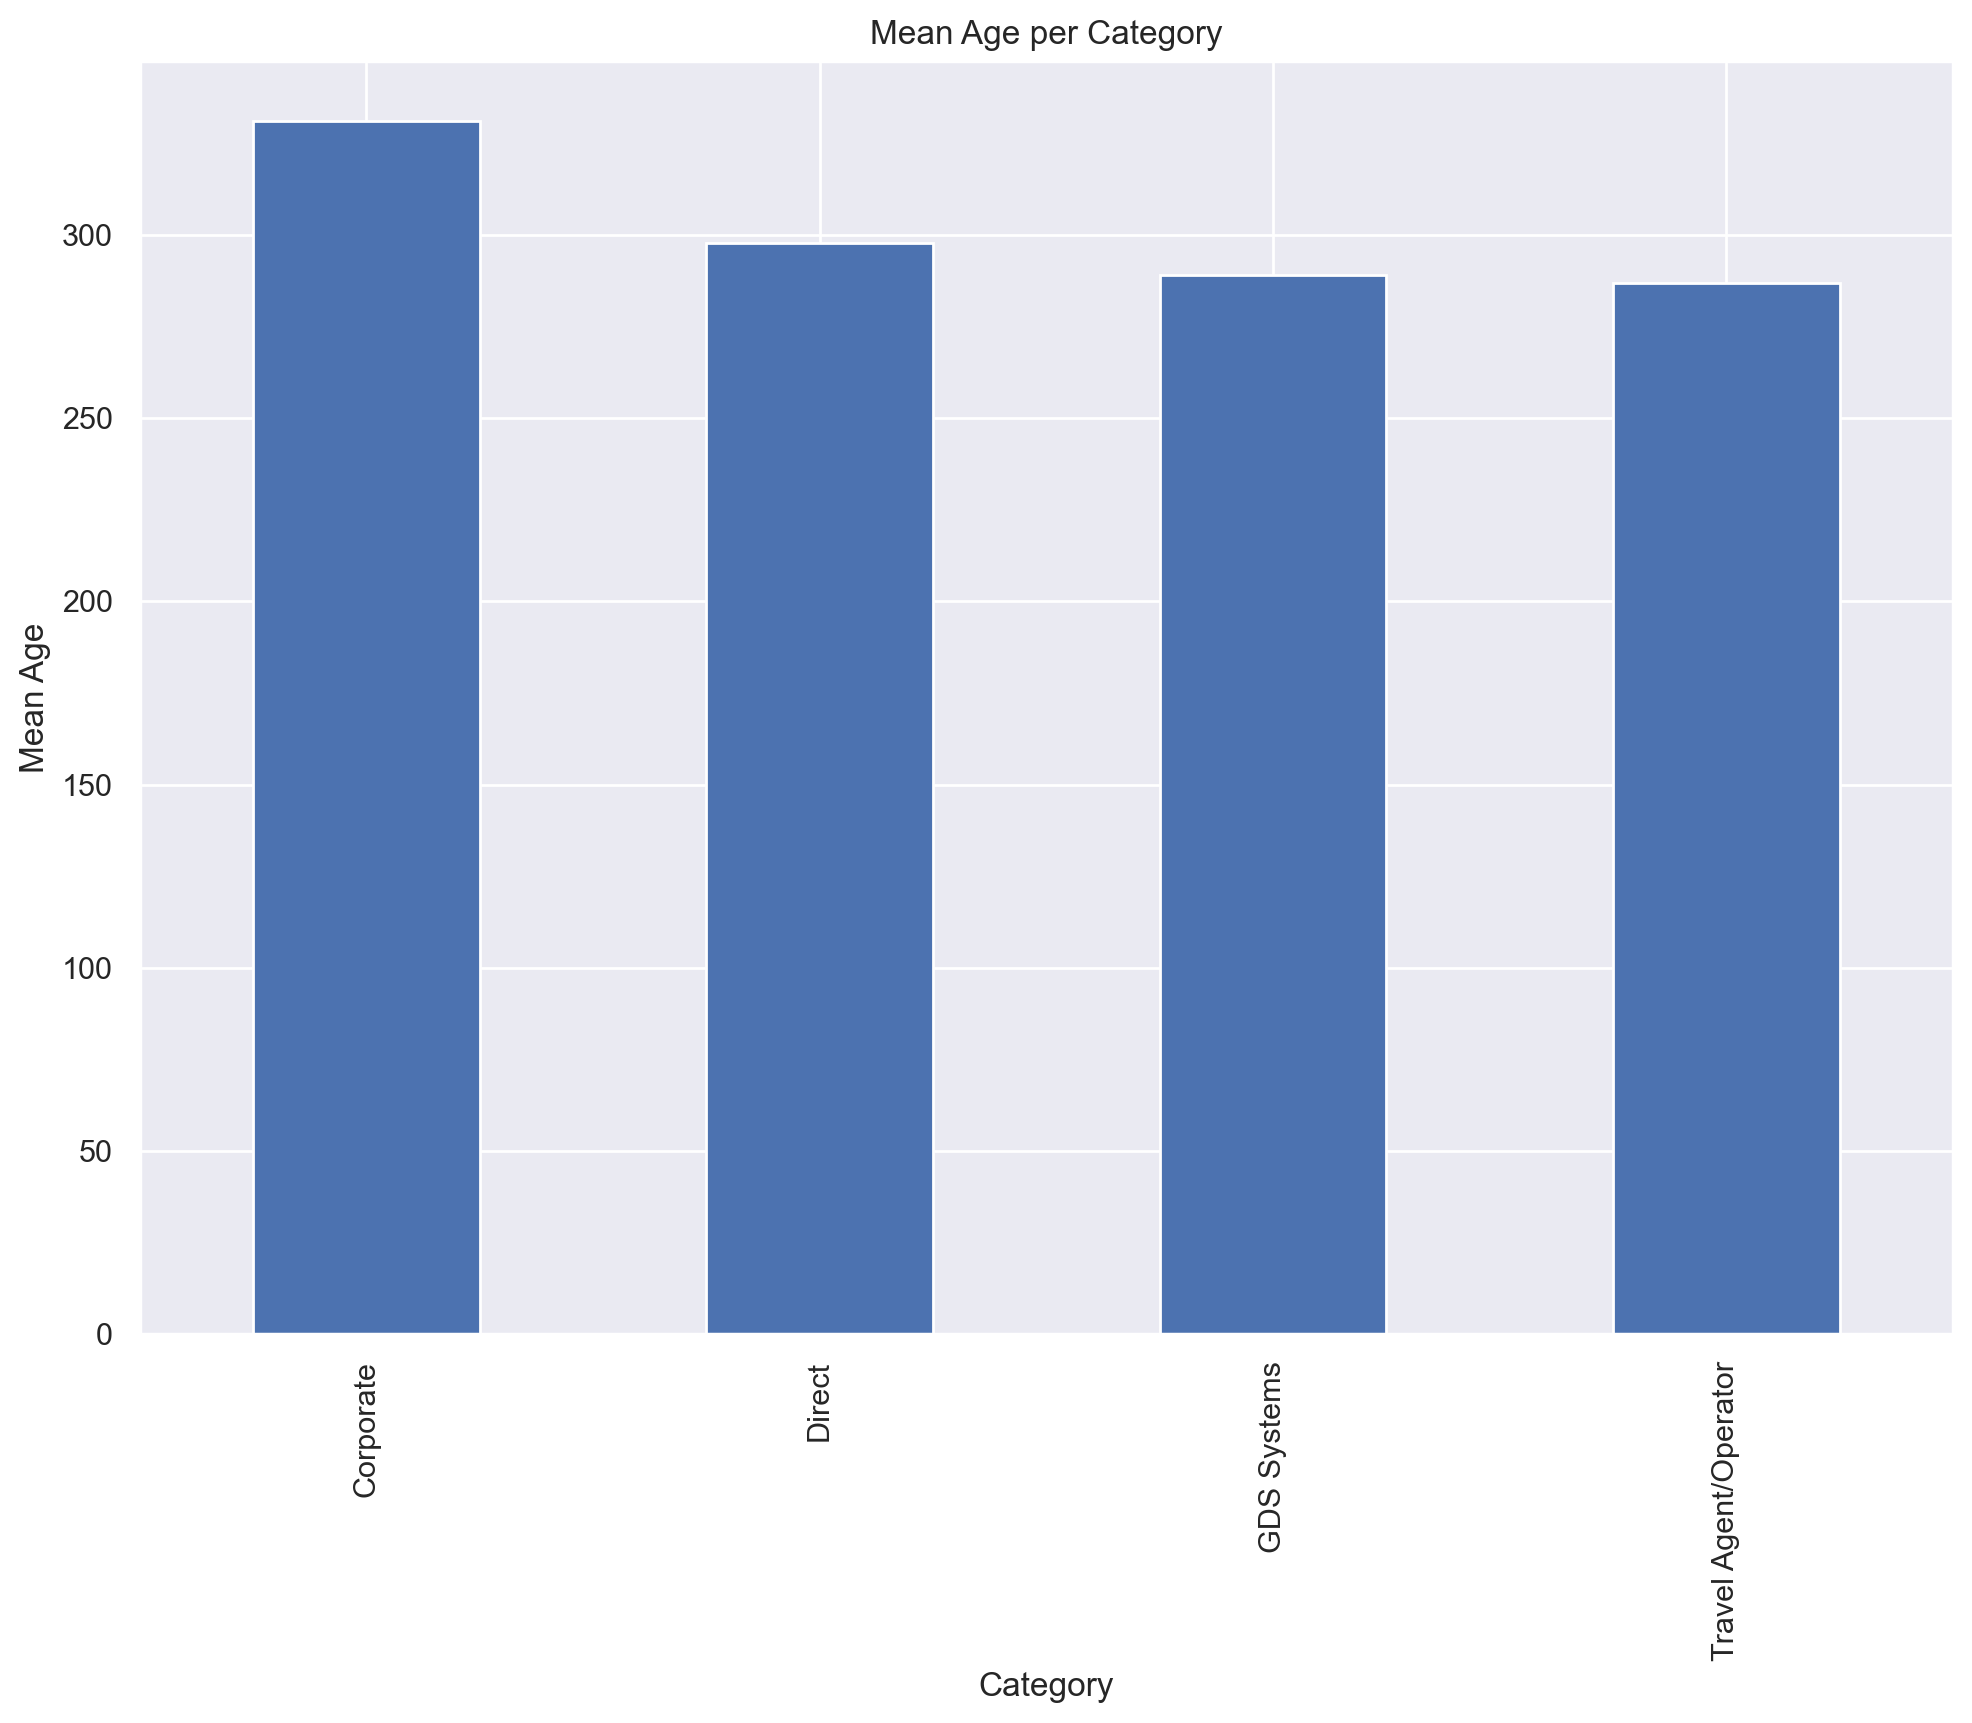

In [141]:
mean_age = df.groupby('DistributionChannel')['LodgingRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

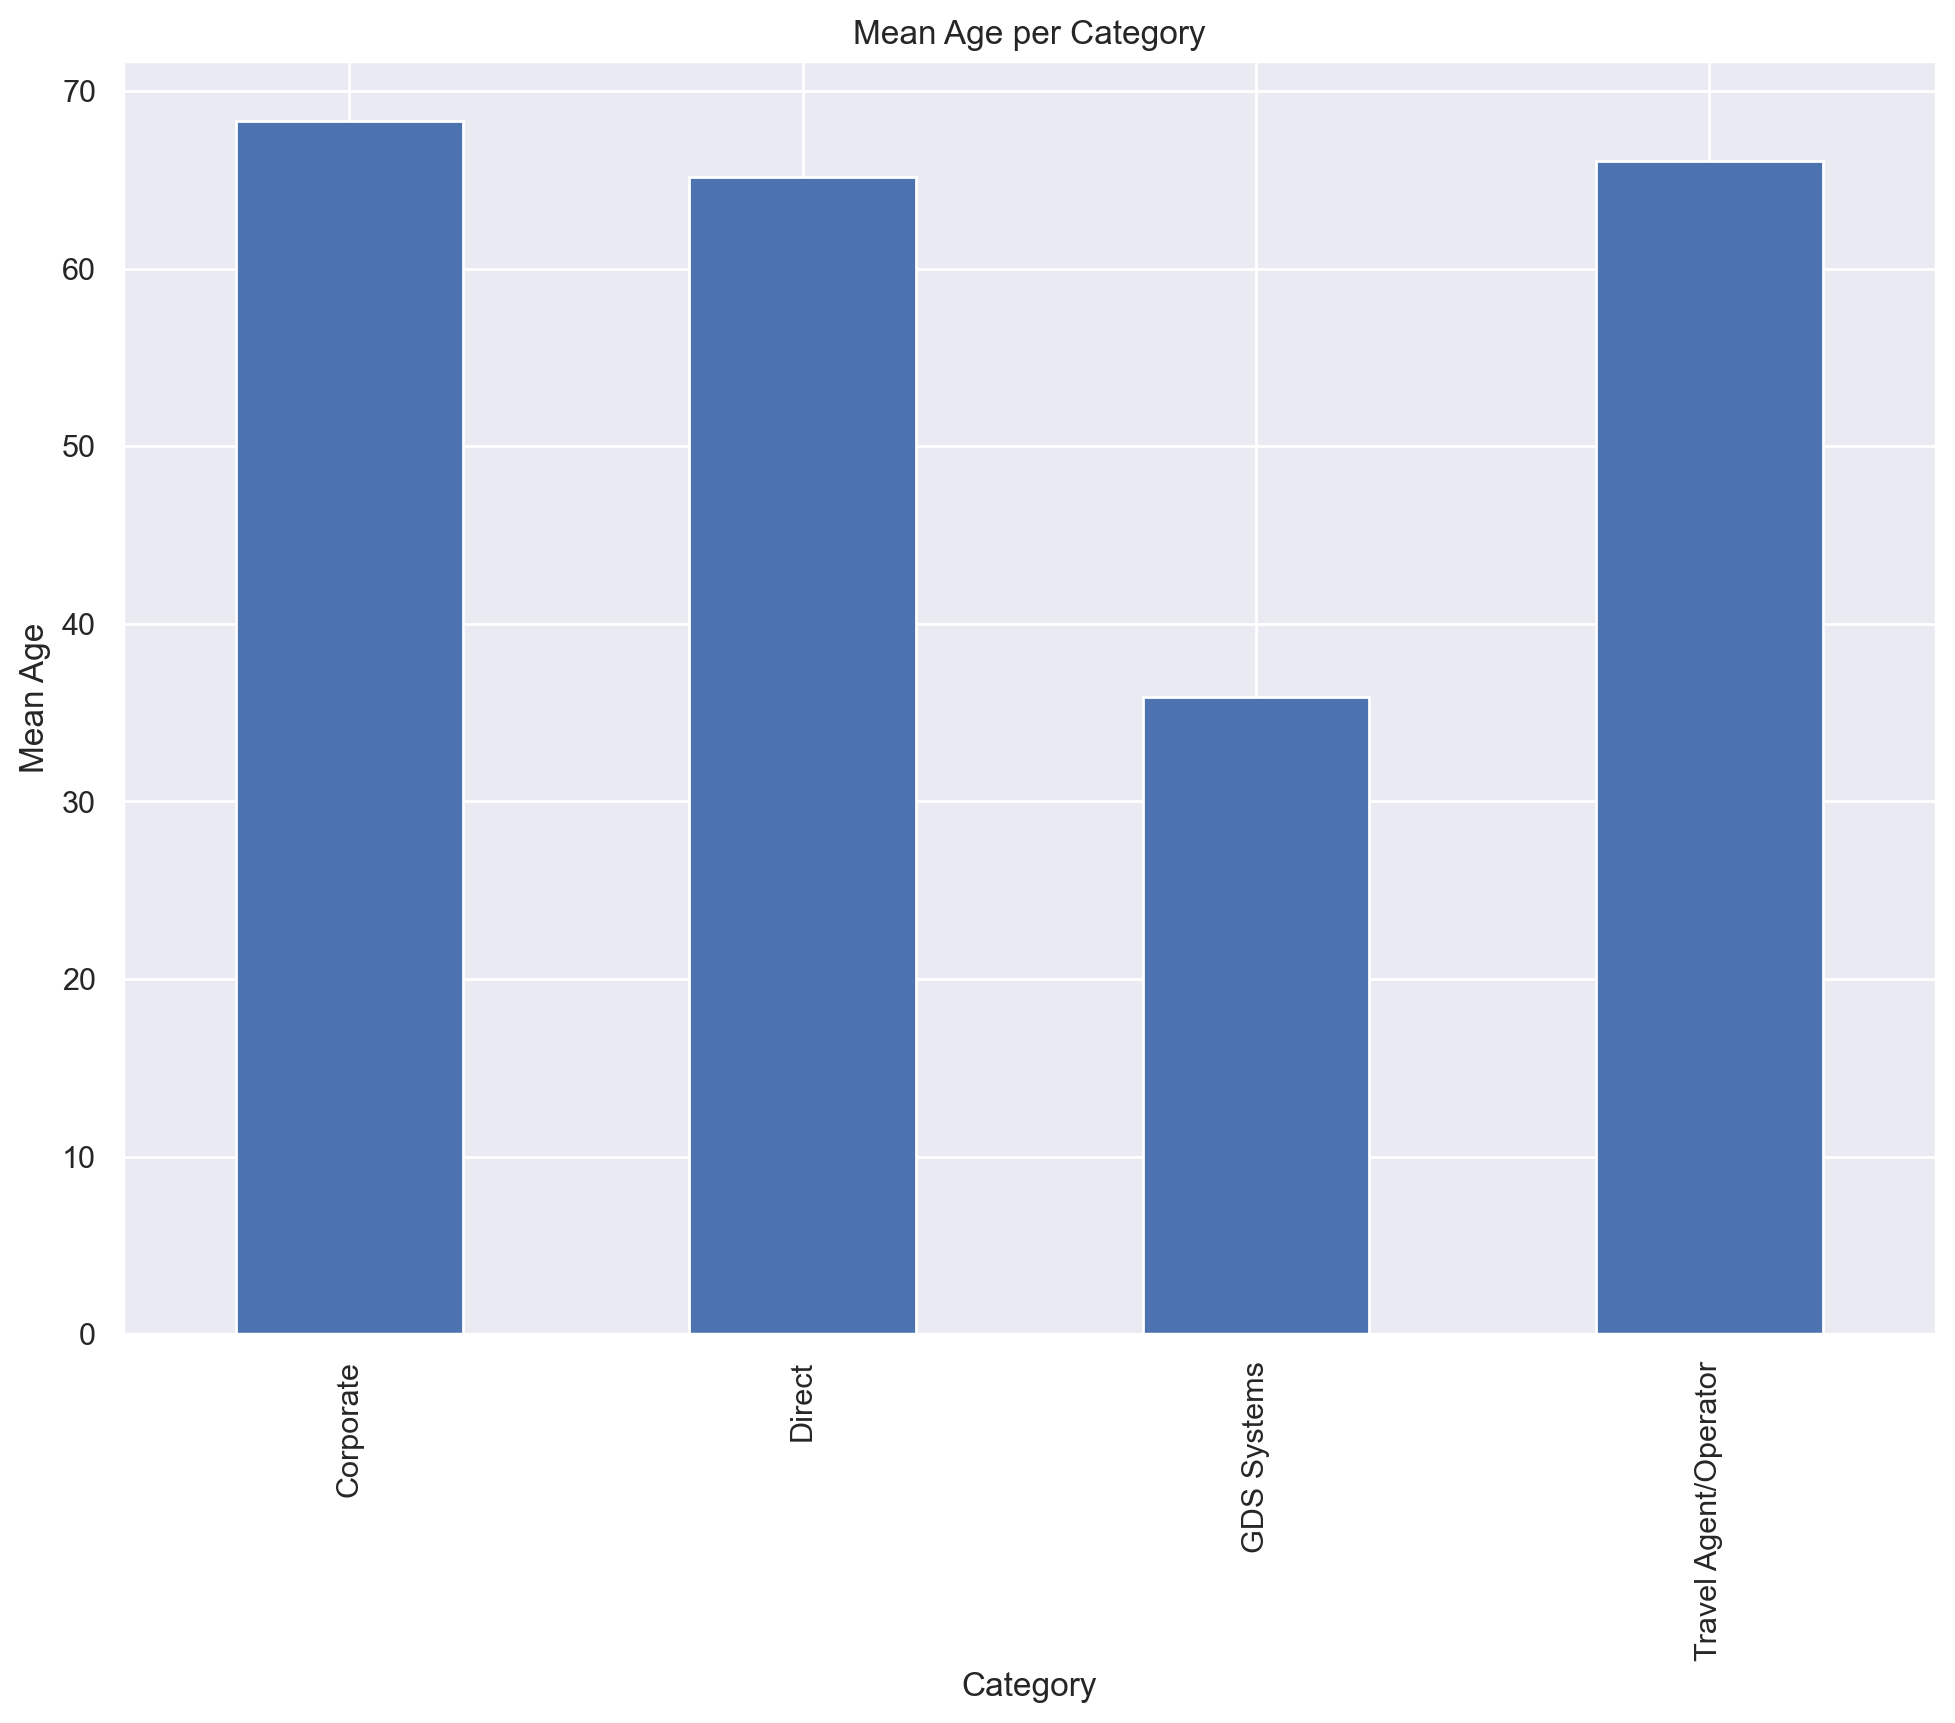

In [142]:
mean_age = df.groupby('DistributionChannel')['OtherRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

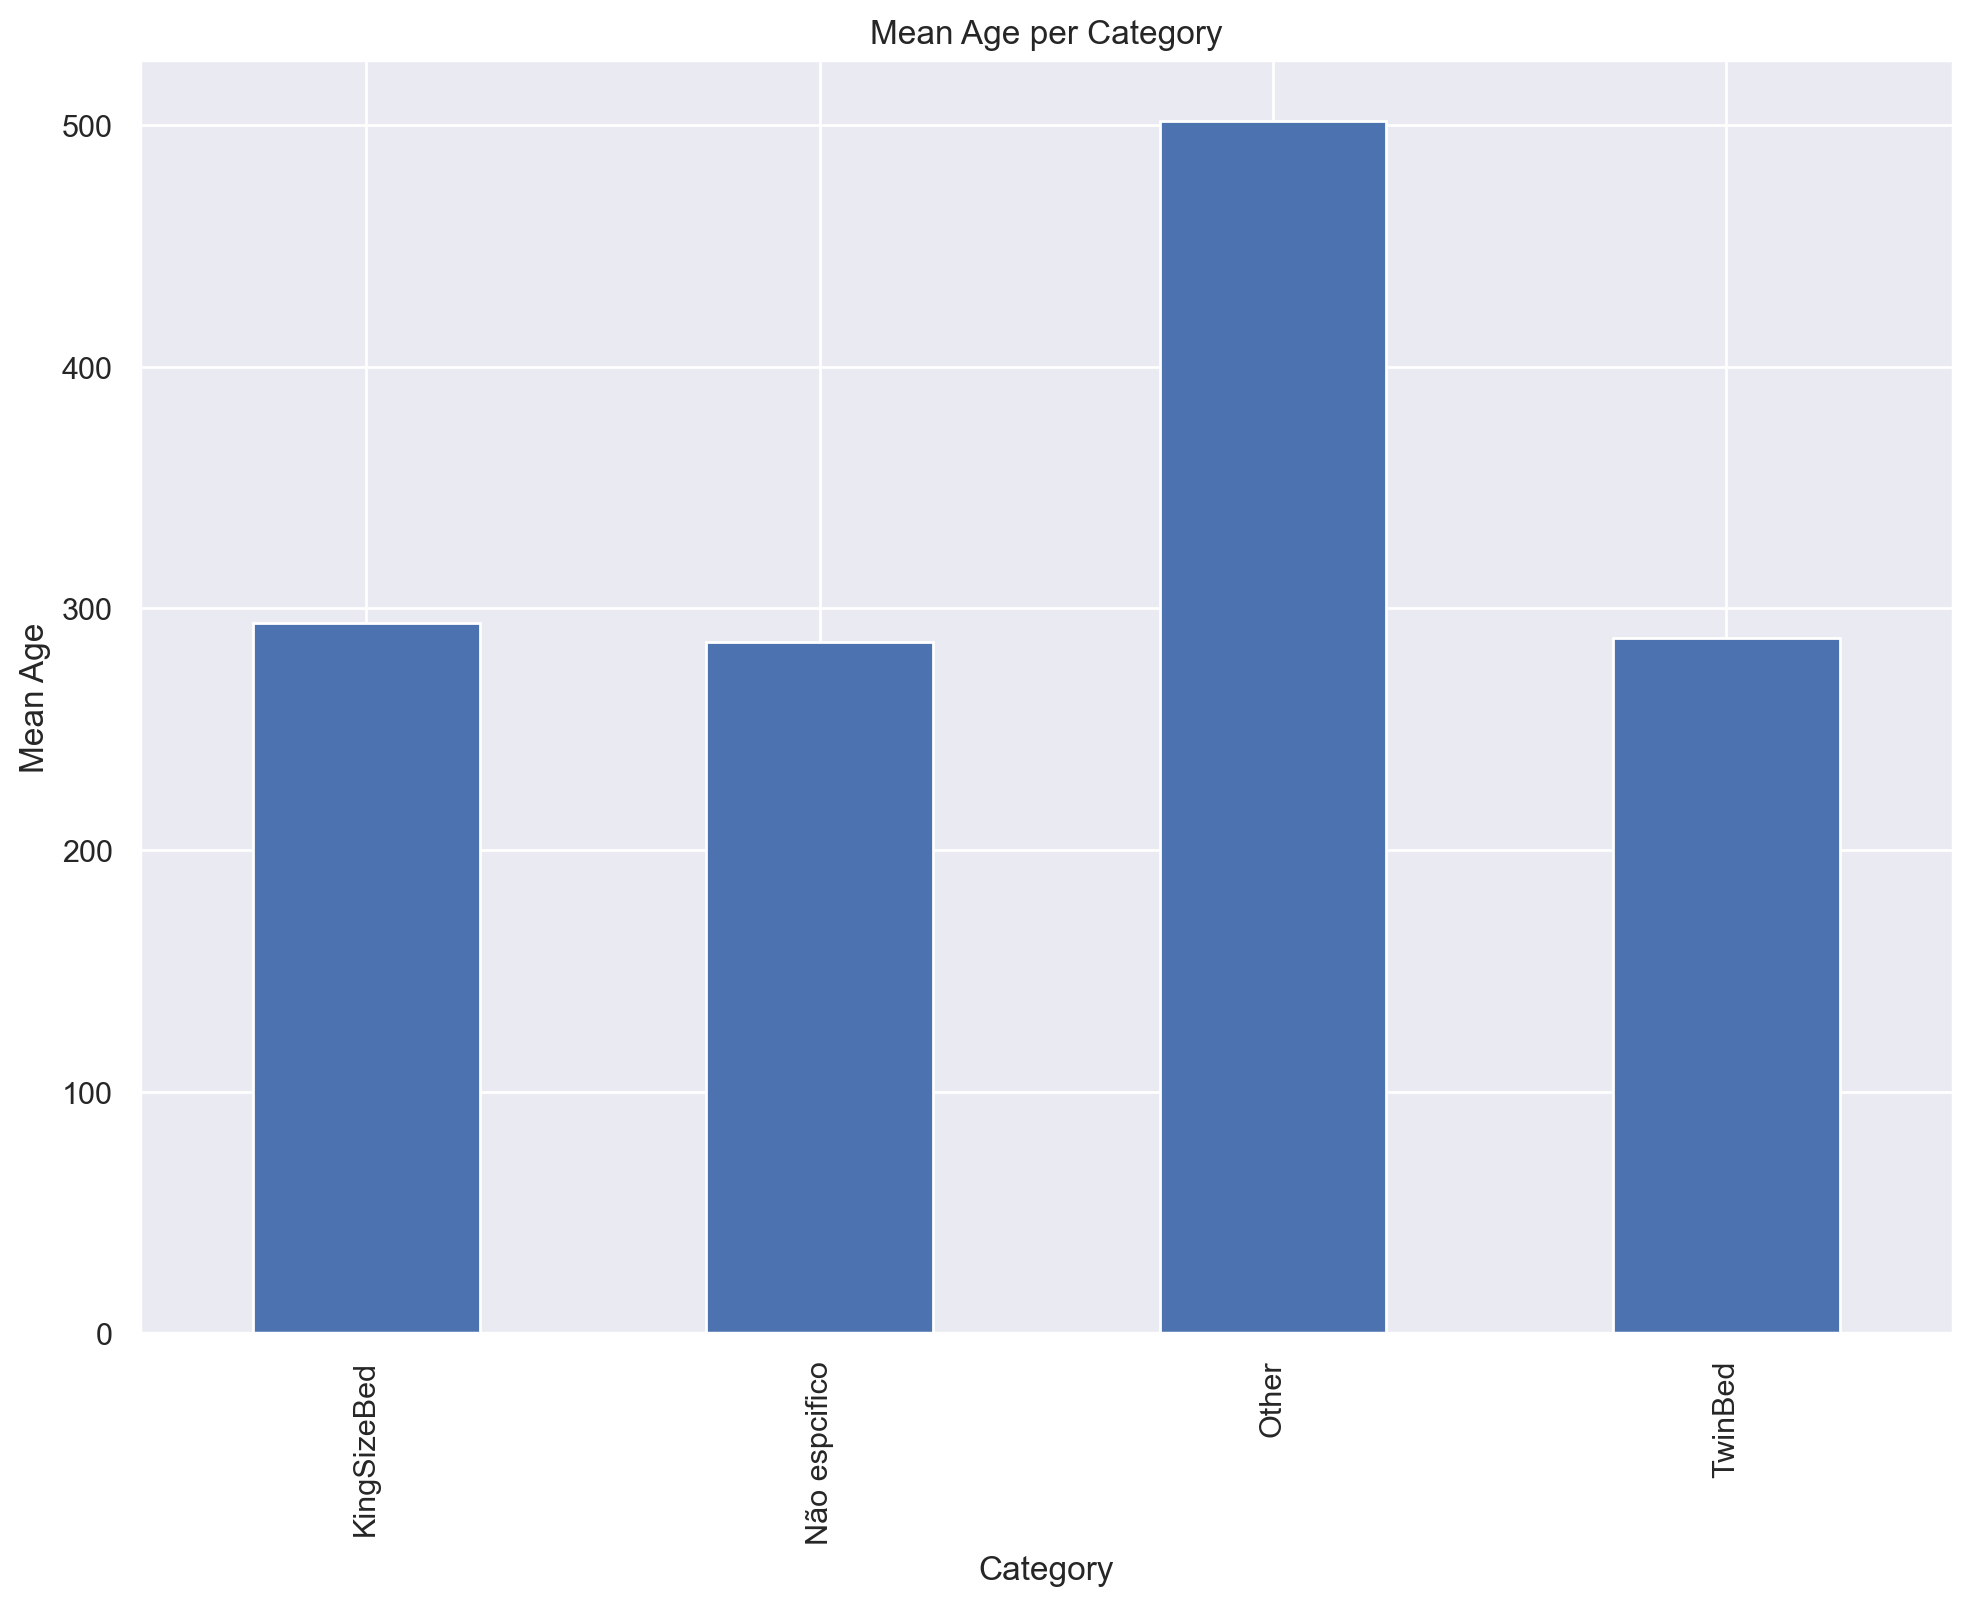

In [143]:
mean_age = df.groupby('Bed_asked')['LodgingRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

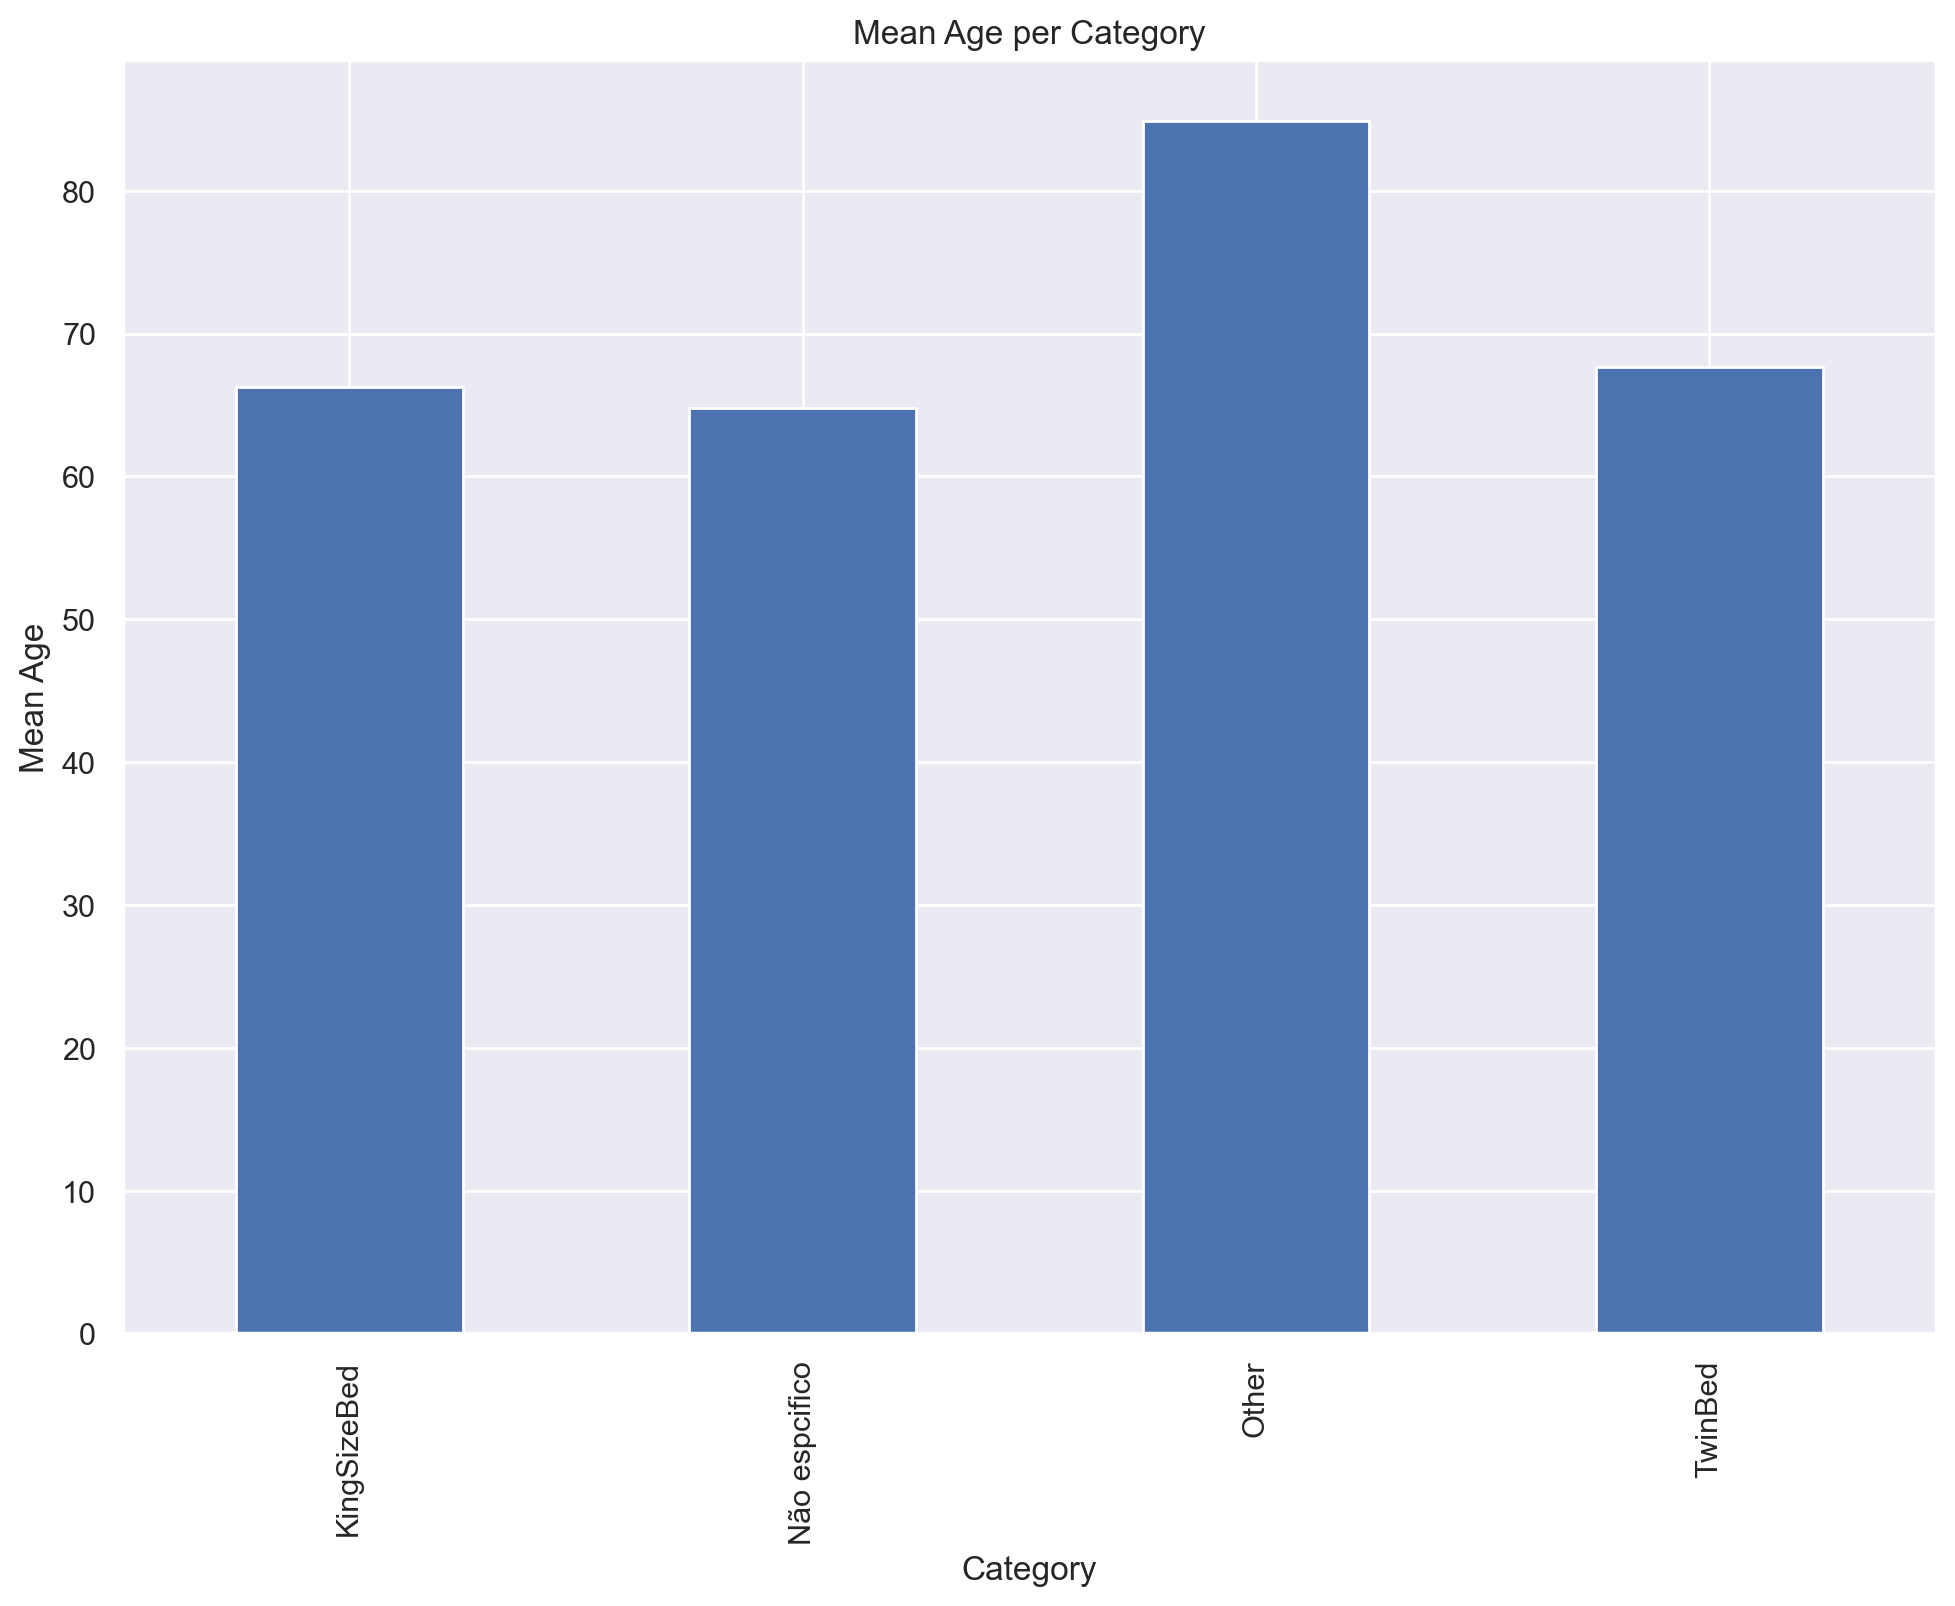

In [145]:
mean_age = df.groupby('Bed_asked')['OtherRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

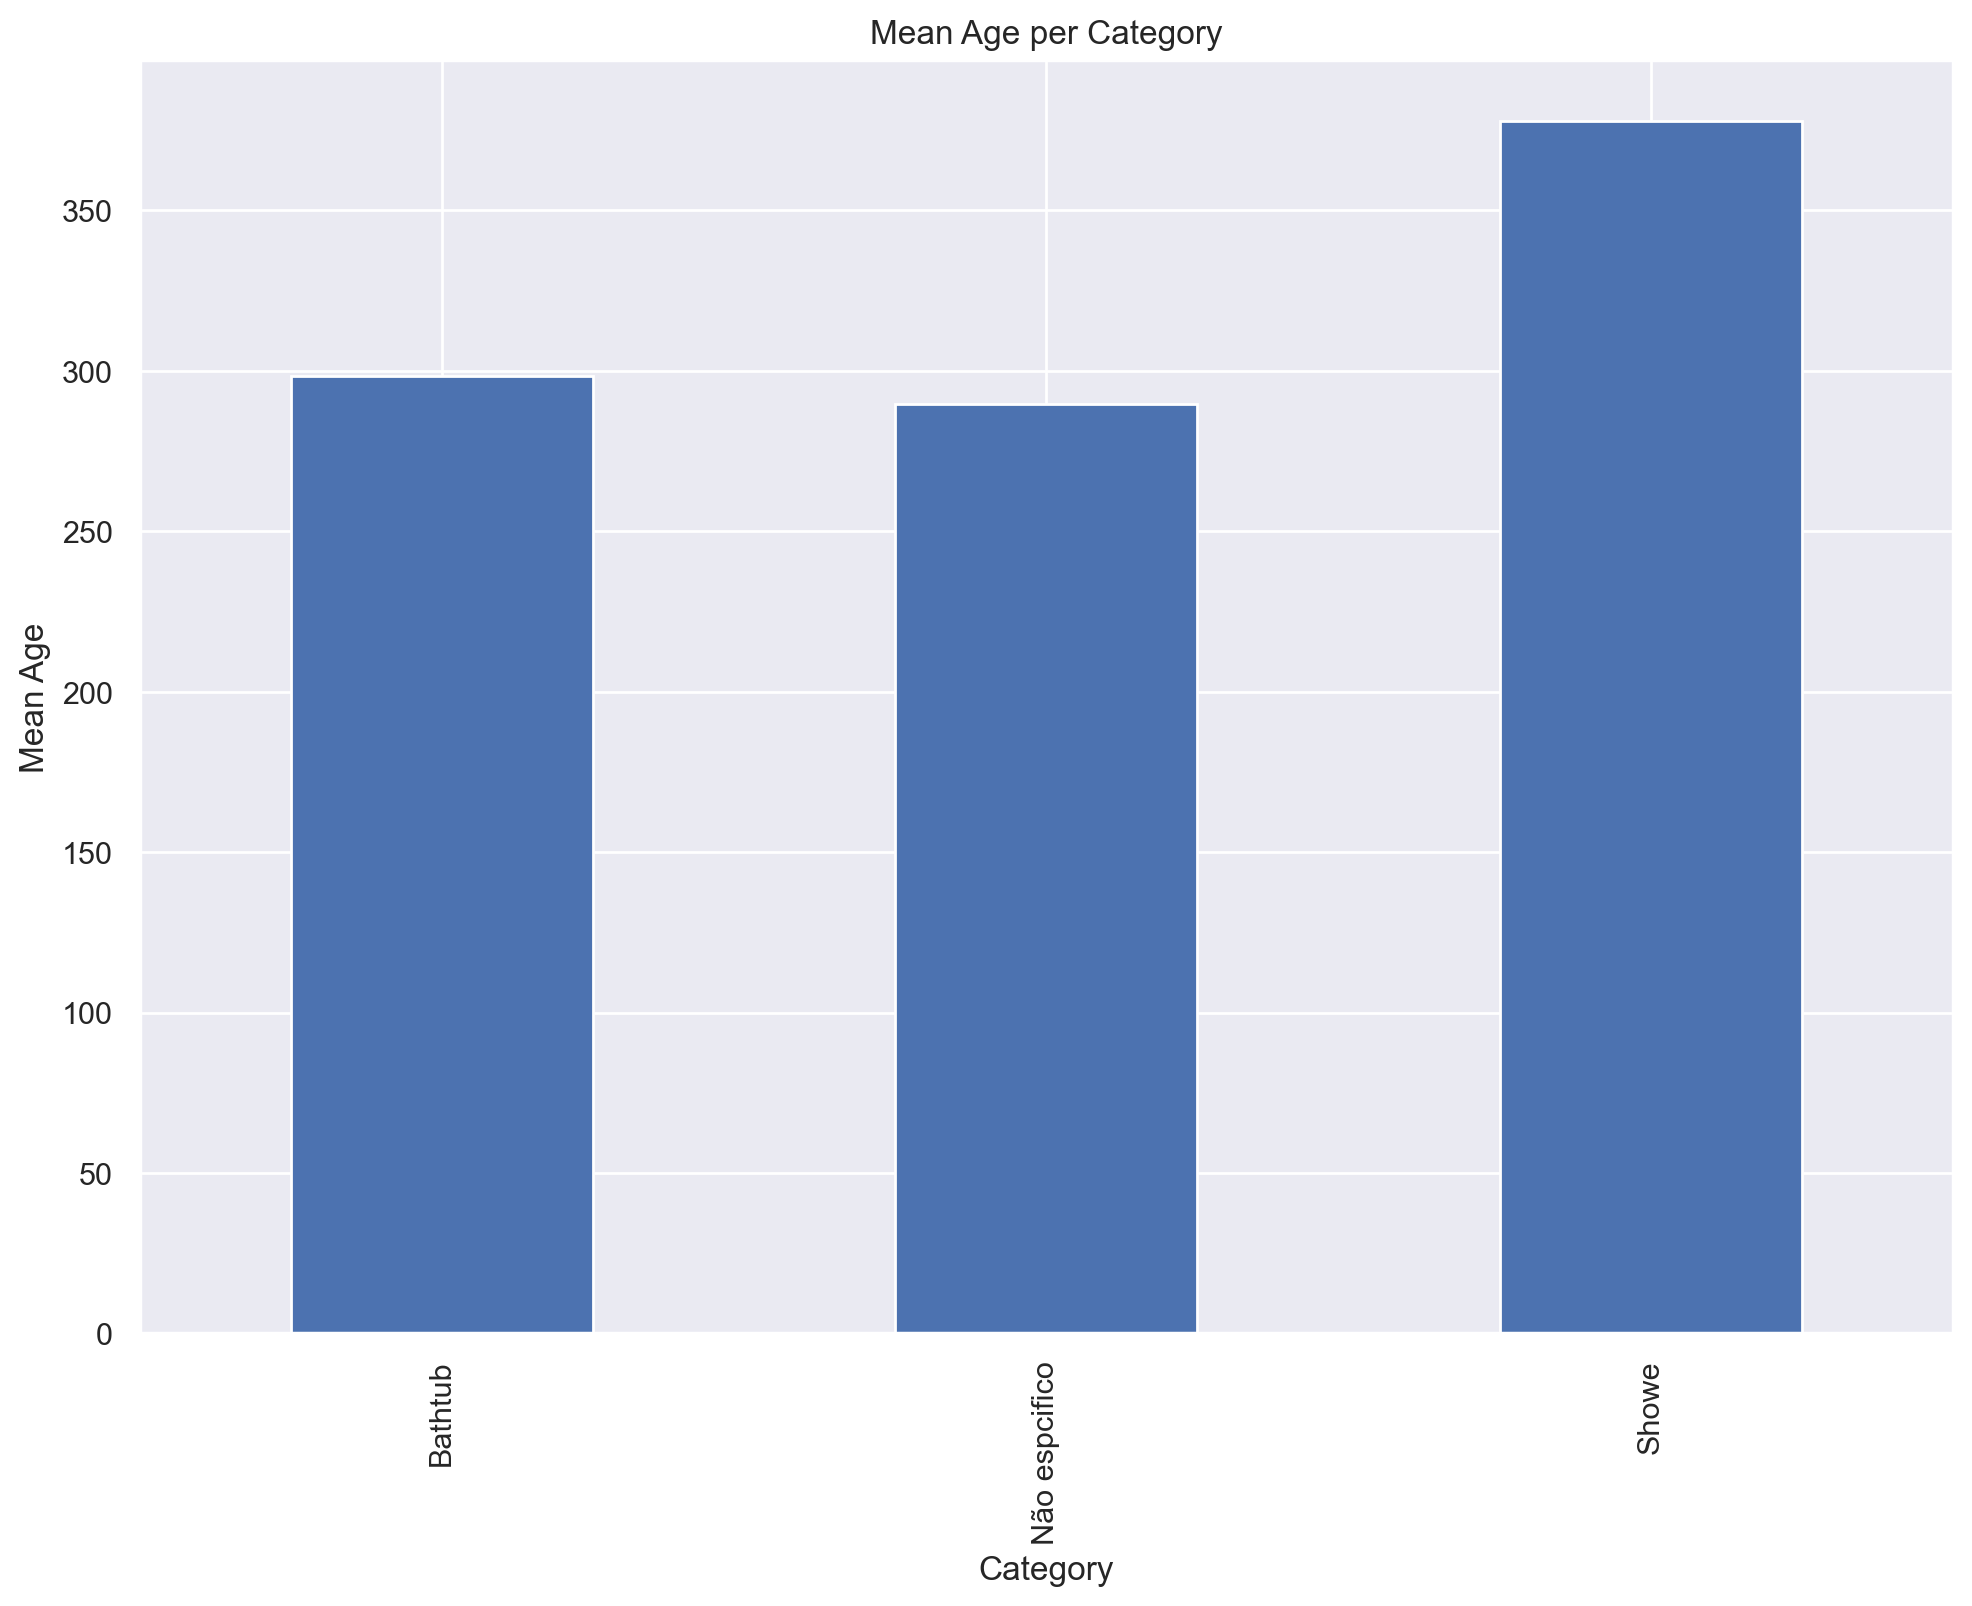

In [147]:
mean_age = df.groupby('Bath asked')['LodgingRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

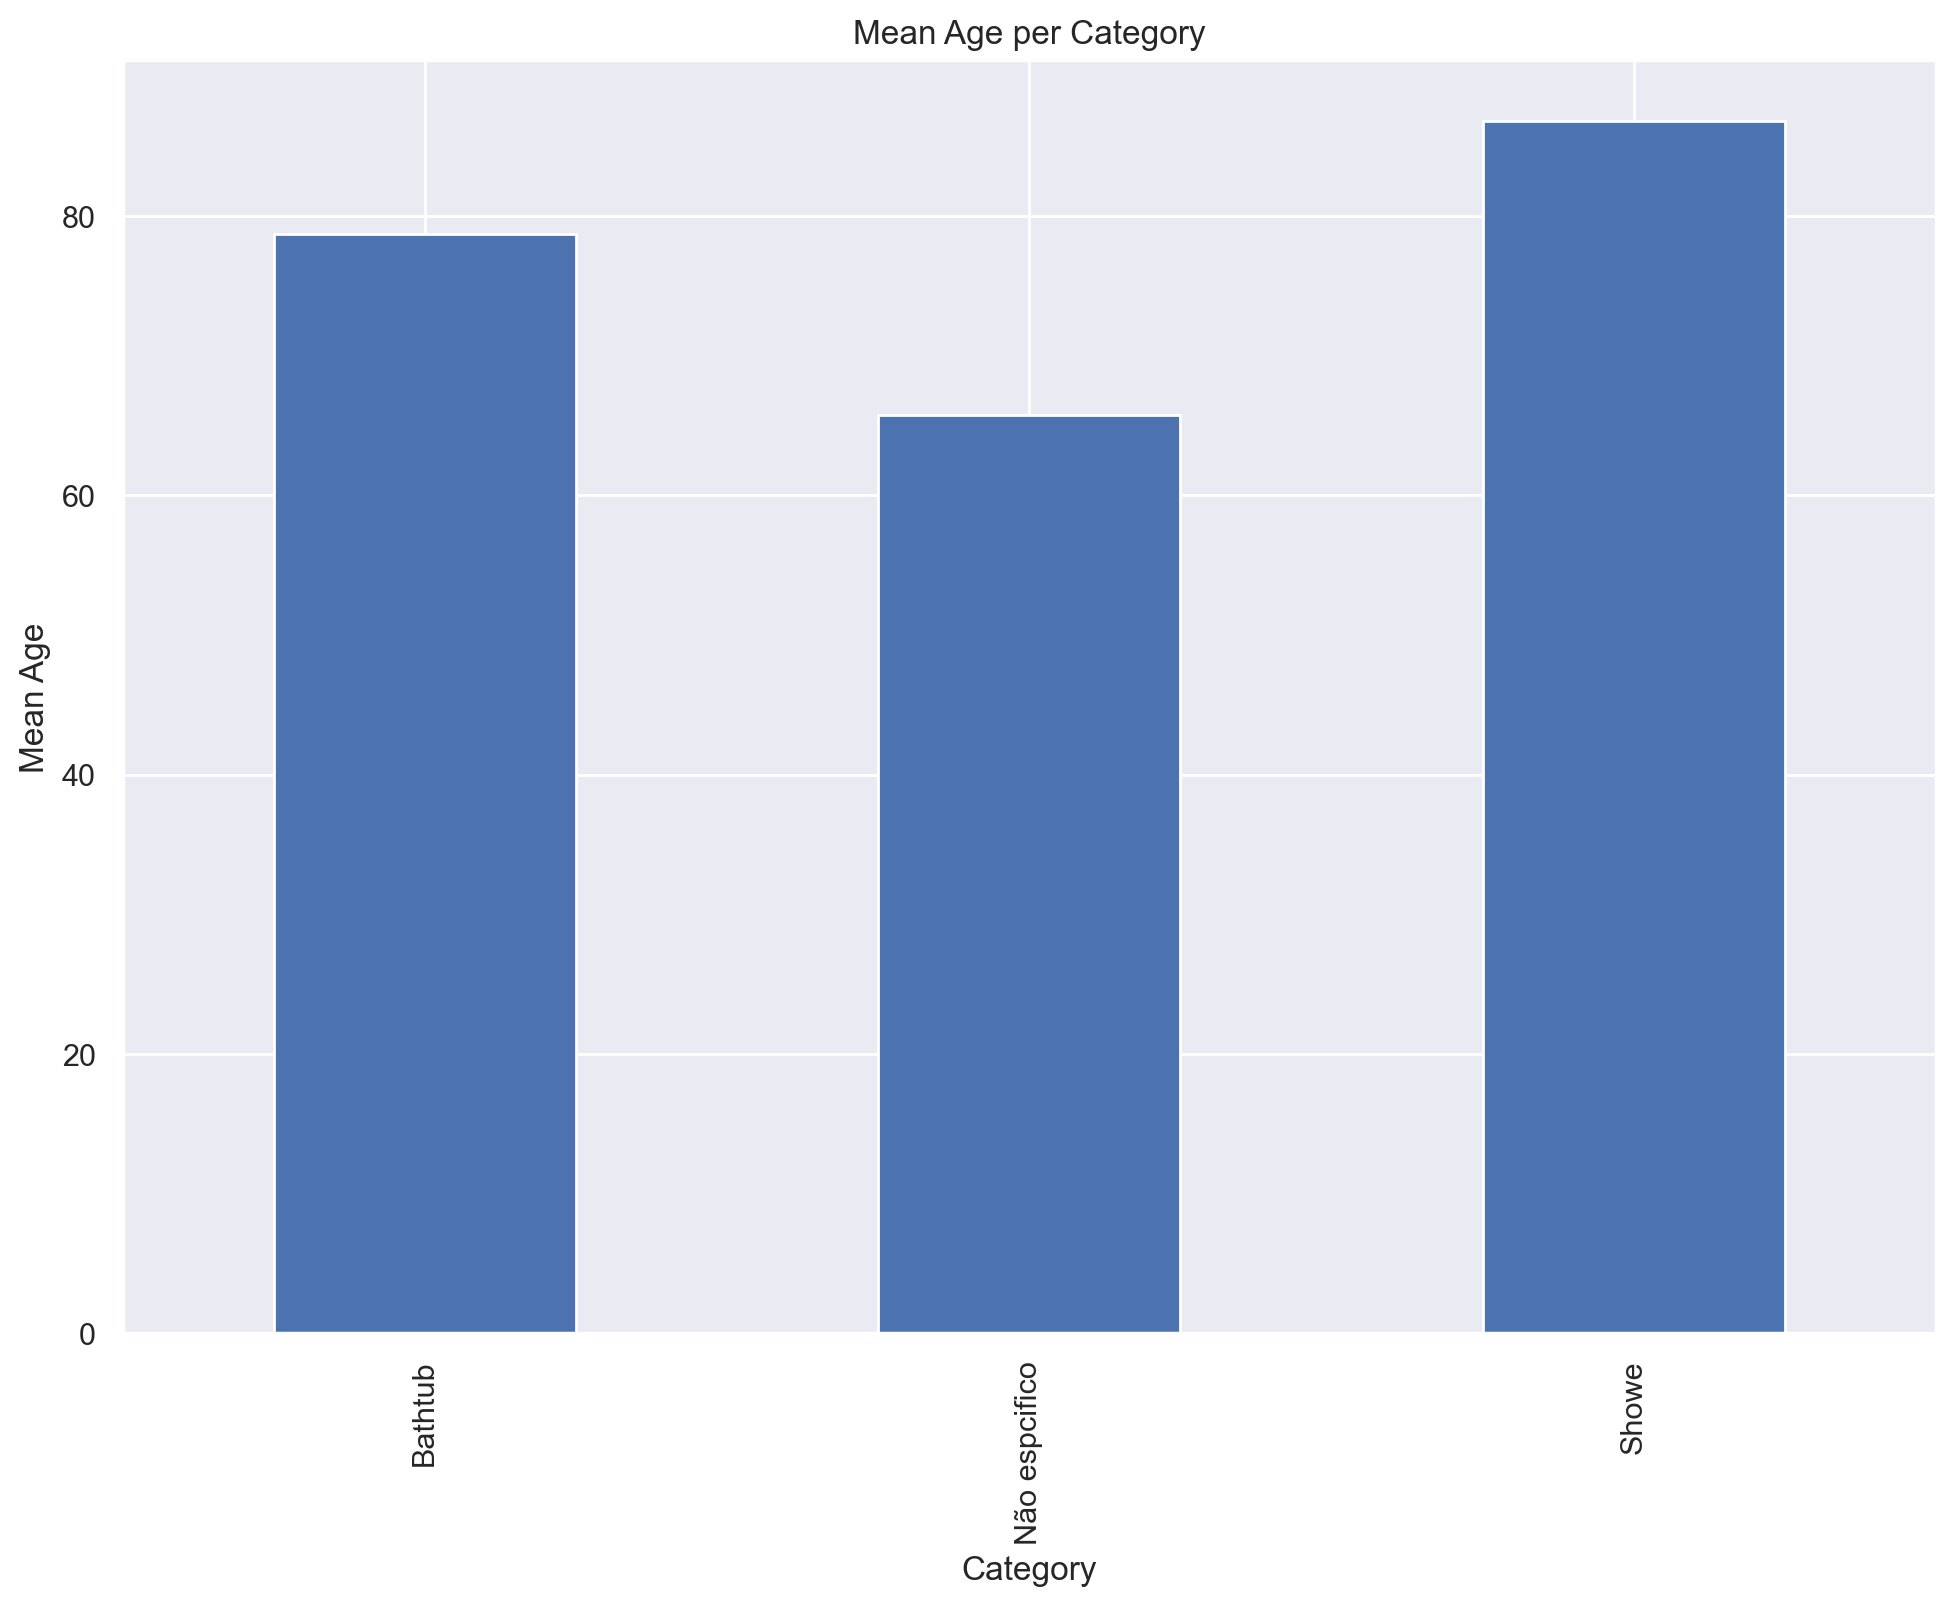

In [149]:
mean_age = df.groupby('Bath asked')['OtherRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

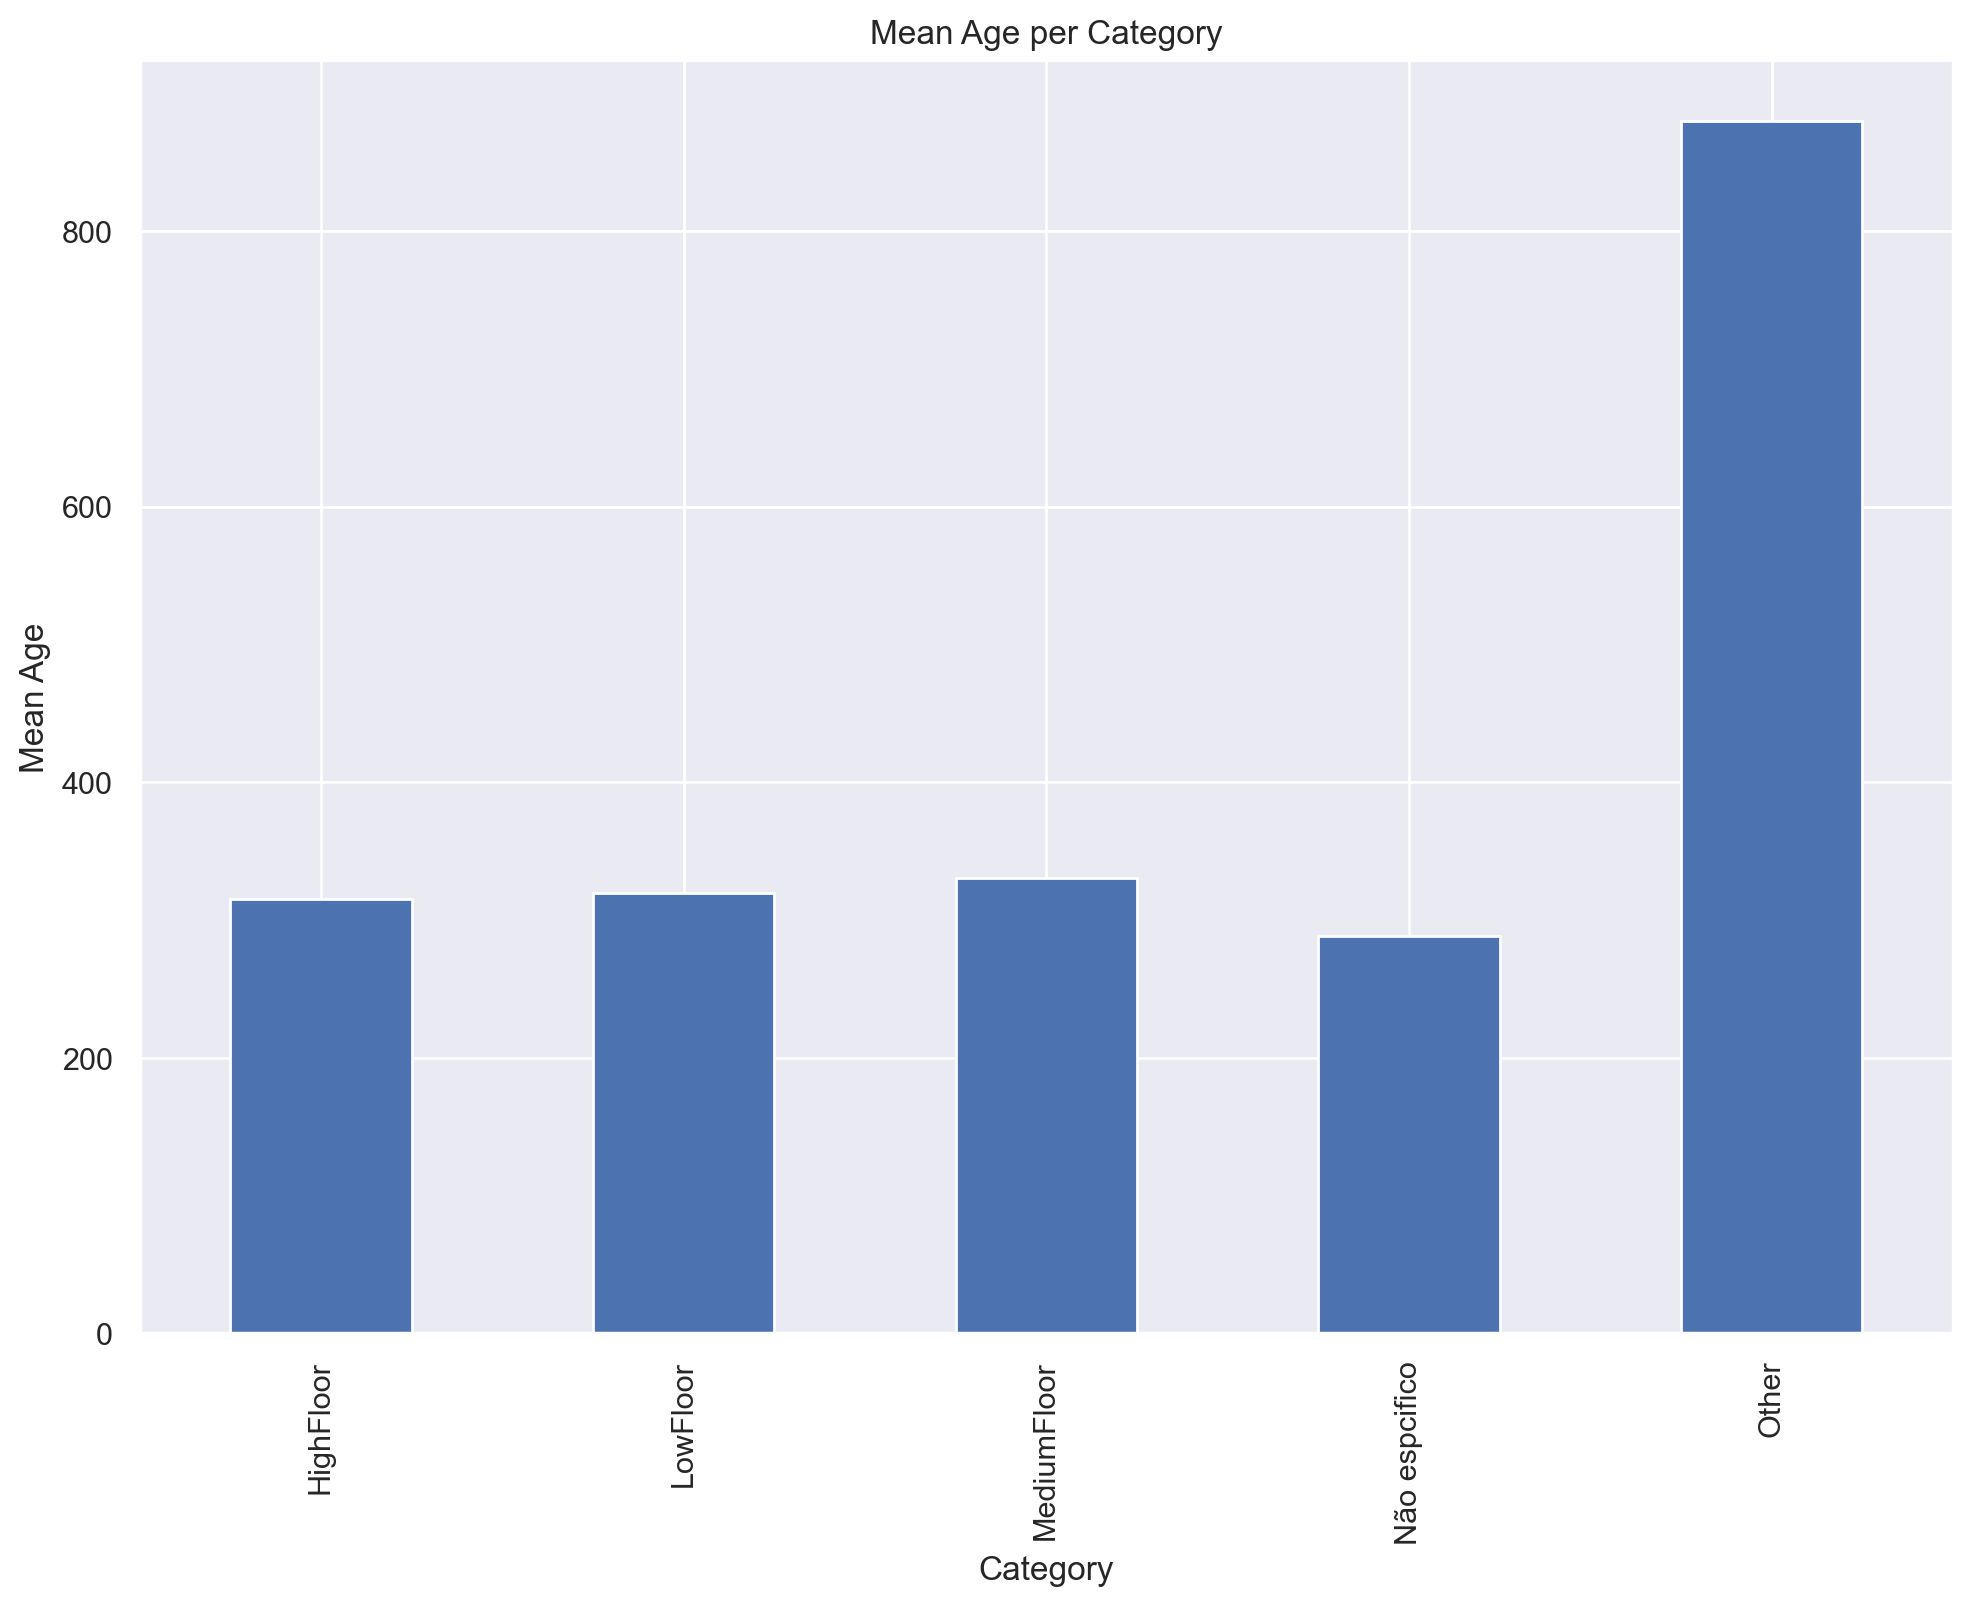

In [150]:
mean_age = df.groupby('Floor_asked')['LodgingRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()

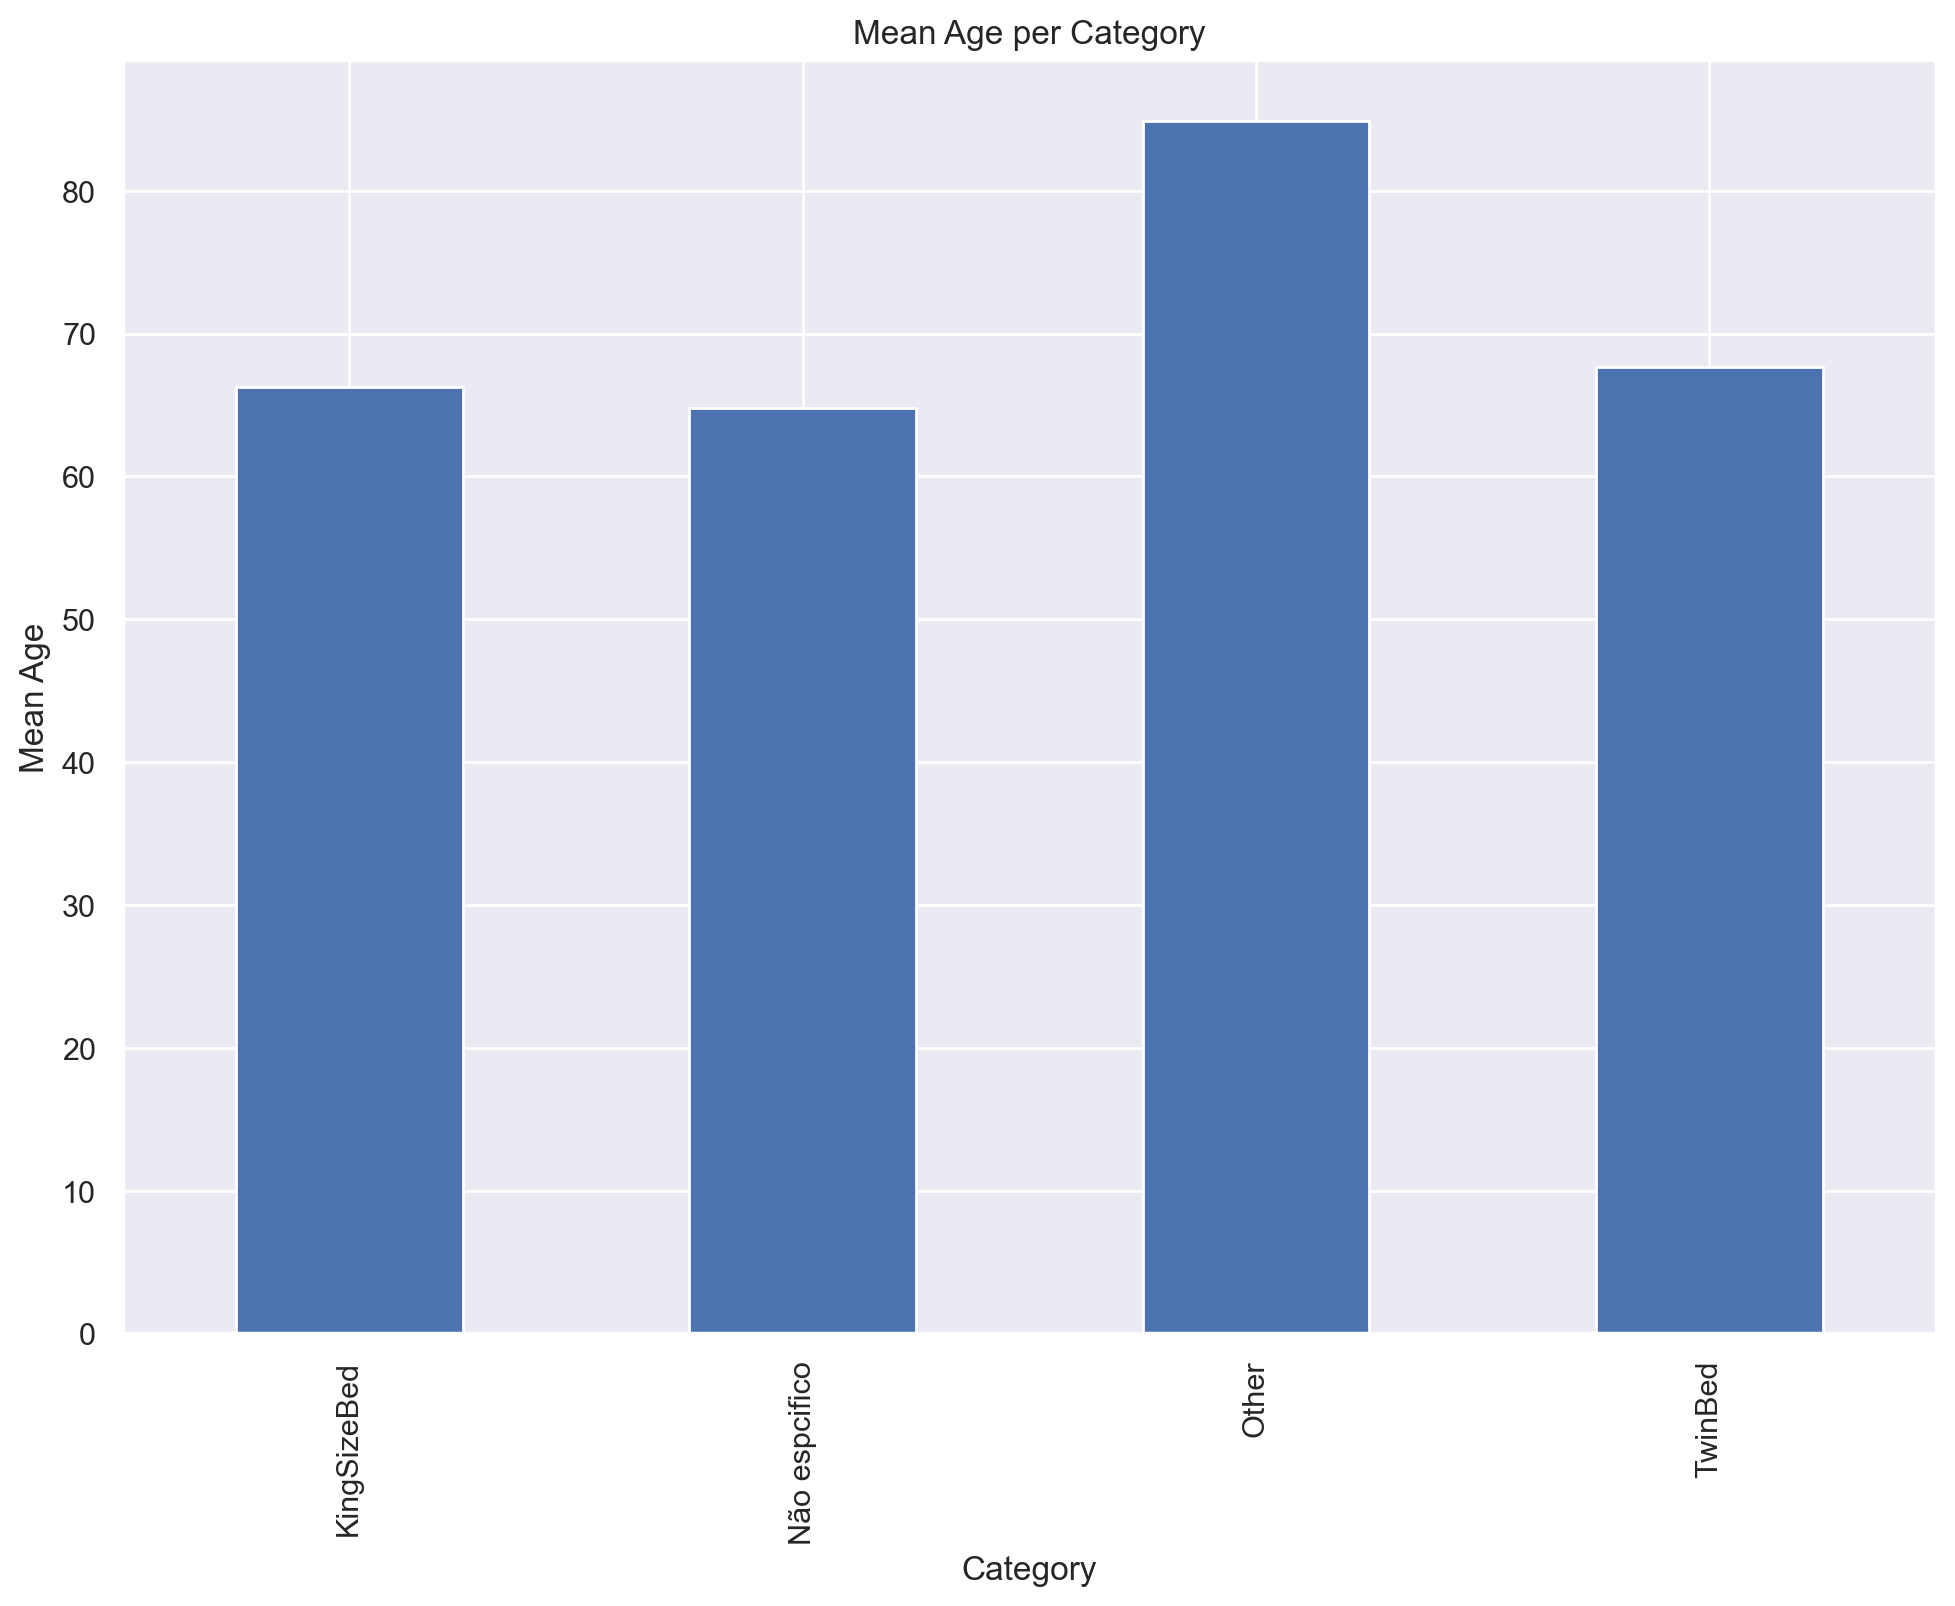

In [151]:
mean_age = df.groupby('Bed_asked')['OtherRevenue'].mean()
# Create the bar plot
mean_age.plot(kind='bar')

# Labeling
plt.xlabel('Category')
plt.ylabel('Mean Age')
plt.title('Mean Age per Category')

# Show the plot
plt.show()